<a href="https://colab.research.google.com/github/Sievv/Sievv/blob/main/Klebsiella%20model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


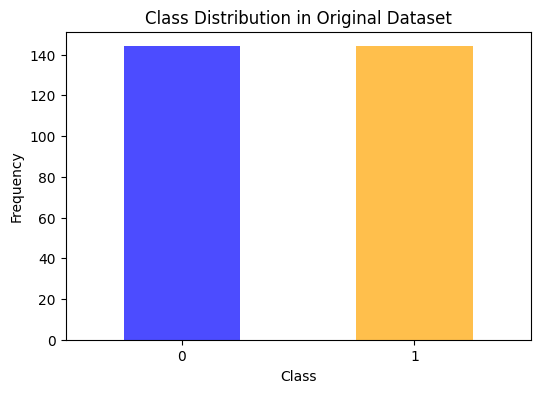

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Load datasets
active = pd.read_csv('/content/drive/MyDrive/inactive_145.csv')
inactive = pd.read_csv('/content/drive/MyDrive/KP/klebsiella active class.csv')

# Combine and shuffle datasets
data = pd.concat([active, inactive], ignore_index=True)
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

# Plot original class distribution
plt.figure(figsize=(6, 4))
data['Activity'].value_counts().plot(kind='bar', color=['blue', 'orange'], alpha=0.7)
plt.title("Class Distribution in Original Dataset")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.show()


In [76]:
import pandas as pd

# Load datasets
active = pd.read_csv('/content/drive/MyDrive/inactive_145.csv')
inactive = pd.read_csv('/content/drive/MyDrive/KP/klebsiella active class.csv')

# Combine datasets
data = pd.concat([active, inactive], ignore_index=True)

# Check for missing values
print("Missing Values:")
print(data.isnull().sum())


# Basic summary statistics
print("\nSummary Statistics:")
print(data.describe())

# Data types of columns
print("\nData Types:")
print(data.dtypes)

Missing Values:
ID                             0
Sequence                       0
Length                         0
Charge                         0
Hydrophobicity                 0
Molecular_Weight               0
Isoelectric_Point              0
Number_of_Cysteines            0
Number_of_Disulfide_Bridges    0
Flexibility                    0
Helix                          0
Turn                           0
Sheet                          0
A                              0
C                              0
D                              0
E                              0
F                              0
G                              0
H                              0
I                              0
K                              0
L                              0
M                              0
N                              0
P                              0
Q                              0
R                              0
S                              0
T                          

In [77]:
import pandas as pd
from sklearn.model_selection import train_test_split
from google.colab import files

# Load datasets
active = pd.read_csv('/content/drive/MyDrive/inactive_145.csv')
inactive = pd.read_csv('/content/drive/MyDrive/KP/klebsiella active class.csv')

# Combine datasets
data = pd.concat([active, inactive], ignore_index=True)

# Shuffle dataset
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

# Save the combined dataset
data.to_csv('/content/combined_data.csv', index=False)
files.download('/content/combined_data.csv')

# Drop unnecessary columns
data.drop(columns=['ID', 'Sequence'], inplace=True, errors='ignore')

# Separate features and target
X = data.drop(columns=['Activity'])
y = data['Activity']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, test_size=0.2, random_state=42
)

# Save and download the training set
train_data = pd.concat([X_train, y_train], axis=1)
train_data.to_csv('/content/train_data.csv', index=False)
files.download('/content/train_data.csv')

# Save and download the test set
test_data = pd.concat([X_test, y_test], axis=1)
test_data.to_csv('/content/test_data.csv', index=False)
files.download('/content/test_data.csv')

# Show class distribution
print("Training set distribution:")
print(y_train.value_counts())
print("Test set distribution:")
print(y_test.value_counts())


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Training set distribution:
Activity
1    116
0    114
Name: count, dtype: int64
Test set distribution:
Activity
0    30
1    28
Name: count, dtype: int64


In [5]:
# Load datasets
training = pd.read_csv('/content/train_data.csv')
testing = pd.read_csv('/content/test_data.csv')
print(training.head())
print(testing  .head())

   Length  Charge  Hydrophobicity  Molecular_Weight  Isoelectric_Point  \
0      26       5            58.0         2653.2763          10.176995   
1      34       8           -33.2         4248.7946          11.829191   
2      38       9            39.0         4349.2223          11.165940   
3      15      -1            -8.1         1751.8930           4.353094   
4      20       7            65.0         2006.5647          10.699318   

   Number_of_Cysteines  Number_of_Disulfide_Bridges  Flexibility     Helix  \
0                    0                            0     1.005302  0.615385   
1                    0                            0     0.986162  0.205882   
2                    0                            0     1.011989  0.394737   
3                    0                            0     0.988482  0.266667   
4                    0                            0     1.008466  0.800000   

       Turn  ...         N         P         Q         R         S         T  \
0  0.1

In [6]:
import pandas as pd

# Load datasets
training = pd.read_csv('/content/train_data.csv')
testing = pd.read_csv('/content/test_data.csv')

# Check the first few rows of each dataset
print(training.head())
print(testing.head())

import pandas as pd

# Load datasets
training = pd.read_csv('/content/train_data.csv')
testing = pd.read_csv('/content/test_data.csv')

# Check the first few rows of each dataset
print(training.head())
print(testing.head())

# Separate X_test and y_test for Klebsiella
X_test_klebsiella = testing.drop(columns=['Activity'])
y_test_klebsiella = testing['Activity']

# Saving the separated files for Klebsiella
X_test_klebsiella.to_csv('/content/X_test_klebsiella.csv', index=False)
y_test_klebsiella.to_csv('/content/y_test_klebsiella.csv', index=False)

X_test_klebsiella.head(), y_test_klebsiella.head()
X_test_klebsiella.to_csv('/content/X_test_klebsiella.csv', index=False)
y_test_klebsiella.to_csv('/content/y_test_klebsiella.csv', index=False)

X_test_klebsiella.head(), y_test_klebsiella.head()


   Length  Charge  Hydrophobicity  Molecular_Weight  Isoelectric_Point  \
0      26       5            58.0         2653.2763          10.176995   
1      34       8           -33.2         4248.7946          11.829191   
2      38       9            39.0         4349.2223          11.165940   
3      15      -1            -8.1         1751.8930           4.353094   
4      20       7            65.0         2006.5647          10.699318   

   Number_of_Cysteines  Number_of_Disulfide_Bridges  Flexibility     Helix  \
0                    0                            0     1.005302  0.615385   
1                    0                            0     0.986162  0.205882   
2                    0                            0     1.011989  0.394737   
3                    0                            0     0.988482  0.266667   
4                    0                            0     1.008466  0.800000   

       Turn  ...         N         P         Q         R         S         T  \
0  0.1

(   Length  Charge  Hydrophobicity  Molecular_Weight  Isoelectric_Point  \
 0      29       2          -18.60         3220.5901           9.520514   
 1      31       6           35.00         3443.0097          10.637042   
 2      16       7           18.75         2106.5315          11.999968   
 3      14       4           71.00         1479.8920          10.302064   
 4      25       4            3.90         2468.9597           9.699994   
 
    Number_of_Cysteines  Number_of_Disulfide_Bridges  Flexibility     Helix  \
 0                    0                            0     1.014596  0.310345   
 1                    0                            0     1.015455  0.451613   
 2                    0                            0     1.014568  0.062500   
 3                    0                            0     0.987967  0.785714   
 4                    2                            1     1.000064  0.400000   
 
        Turn  ...     M         N         P    Q         R         S    

In [7]:
import pandas as pd

# Load datasets
training = pd.read_csv('/content/train_data.csv')
testing = pd.read_csv('/content/test_data.csv')

# Check the first few rows of each dataset
print(training.head())
print(testing.head())

# Separate X_train and y_train for Klebsiella
X_train_klebsiella = training.drop(columns=['Activity'])
y_train_klebsiella = training['Activity']

# Saving the separated files for Klebsiella in the training set
X_train_klebsiella.to_csv('/content/X_train_klebsiella.csv', index=False)
y_train_klebsiella.to_csv('/content/y_train_klebsiella.csv', index=False)

# Separate X_test and y_test for Klebsiella
X_test_klebsiella = testing.drop(columns=['Activity'])
y_test_klebsiella = testing['Activity']

# Saving the separated files for Klebsiella in the testing set
X_test_klebsiella.to_csv('/content/X_test_klebsiella.csv', index=False)
y_test_klebsiella.to_csv('/content/y_test_klebsiella.csv', index=False)

# Display the first few rows of the saved data for verification
X_train_klebsiella.head(), y_train_klebsiella.head(), X_test_klebsiella.head(), y_test_klebsiella.head()


   Length  Charge  Hydrophobicity  Molecular_Weight  Isoelectric_Point  \
0      26       5            58.0         2653.2763          10.176995   
1      34       8           -33.2         4248.7946          11.829191   
2      38       9            39.0         4349.2223          11.165940   
3      15      -1            -8.1         1751.8930           4.353094   
4      20       7            65.0         2006.5647          10.699318   

   Number_of_Cysteines  Number_of_Disulfide_Bridges  Flexibility     Helix  \
0                    0                            0     1.005302  0.615385   
1                    0                            0     0.986162  0.205882   
2                    0                            0     1.011989  0.394737   
3                    0                            0     0.988482  0.266667   
4                    0                            0     1.008466  0.800000   

       Turn  ...         N         P         Q         R         S         T  \
0  0.1

(   Length  Charge  Hydrophobicity  Molecular_Weight  Isoelectric_Point  \
 0      26       5            58.0         2653.2763          10.176995   
 1      34       8           -33.2         4248.7946          11.829191   
 2      38       9            39.0         4349.2223          11.165940   
 3      15      -1            -8.1         1751.8930           4.353094   
 4      20       7            65.0         2006.5647          10.699318   
 
    Number_of_Cysteines  Number_of_Disulfide_Bridges  Flexibility     Helix  \
 0                    0                            0     1.005302  0.615385   
 1                    0                            0     0.986162  0.205882   
 2                    0                            0     1.011989  0.394737   
 3                    0                            0     0.988482  0.266667   
 4                    0                            0     1.008466  0.800000   
 
        Turn  ...         M         N         P         Q         R     

In [8]:
# Get the number of rows in the training and testing sets
training_rows = training.shape[0]
testing_rows = testing.shape[0]

training_rows, testing_rows

import pandas as pd

# Load datasets
training = pd.read_csv('/content/train_data.csv')
testing = pd.read_csv('/content/test_data.csv')

# Print the features (columns) in both datasets
print("Features in Training Set:")
print(training.columns)

print("\nFeatures in Testing Set:")
print(testing.columns)



Features in Training Set:
Index(['Length', 'Charge', 'Hydrophobicity', 'Molecular_Weight',
       'Isoelectric_Point', 'Number_of_Cysteines',
       'Number_of_Disulfide_Bridges', 'Flexibility', 'Helix', 'Turn', 'Sheet',
       'A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q',
       'R', 'S', 'T', 'V', 'W', 'Y', 'Activity'],
      dtype='object')

Features in Testing Set:
Index(['Length', 'Charge', 'Hydrophobicity', 'Molecular_Weight',
       'Isoelectric_Point', 'Number_of_Cysteines',
       'Number_of_Disulfide_Bridges', 'Flexibility', 'Helix', 'Turn', 'Sheet',
       'A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q',
       'R', 'S', 'T', 'V', 'W', 'Y', 'Activity'],
      dtype='object')


In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the already separated datasets
X_train_klebsiella = pd.read_csv('/content/X_train_klebsiella.csv')
y_train_klebsiella = pd.read_csv('/content/y_train_klebsiella.csv')
X_test_klebsiella = pd.read_csv('/content/X_test_klebsiella.csv')
y_test_klebsiella = pd.read_csv('/content/y_test_klebsiella.csv')

# Standardize the features (important for models like logistic regression, SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_klebsiella)
X_test_scaled = scaler.transform(X_test_klebsiella)

# Choose a classification model (Random Forest Classifier in this case)
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train_scaled, y_train_klebsiella)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test_klebsiella, y_pred)
print(f"Accuracy: {accuracy}")

# Additional evaluation metrics
print("\nClassification Report:")
print(classification_report(y_test_klebsiella, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_klebsiella, y_pred))

# Feature importances (optional)
feature_importances = model.feature_importances_
print("\nFeature Importances:")
for feature, importance in zip(X_train_klebsiella.columns, feature_importances):
    print(f"{feature}: {importance}")


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.9827586206896551

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       1.00      0.96      0.98        28

    accuracy                           0.98        58
   macro avg       0.98      0.98      0.98        58
weighted avg       0.98      0.98      0.98        58


Confusion Matrix:
[[30  0]
 [ 1 27]]

Feature Importances:
Length: 0.019029151542713844
Charge: 0.11894473089045199
Hydrophobicity: 0.2937197226321835
Molecular_Weight: 0.02427812461116722
Isoelectric_Point: 0.07773216515934894
Number_of_Cysteines: 0.003854288550392298
Number_of_Disulfide_Bridges: 0.0032859327548772532
Flexibility: 0.01493188111201322
Helix: 0.012479285641520812
Turn: 0.029053580227055727
Sheet: 0.01862358542672439
A: 0.010460583463086483
C: 0.006112375731953335
D: 0.04729907959587886
E: 0.03237112178046341
F: 0.006910226431424966
G: 0.014394683862393603
H: 0.0139781423840712
I: 0.05263421124801

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[30  0]
 [ 1 27]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       1.00      0.96      0.98        28

    accuracy                           0.98        58
   macro avg       0.98      0.98      0.98        58
weighted avg       0.98      0.98      0.98        58



In [78]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Load the already separated datasets
X_train_klebsiella = pd.read_csv('/content/X_train_klebsiella.csv')
y_train_klebsiella = pd.read_csv('/content/y_train_klebsiella.csv')
X_test_klebsiella = pd.read_csv('/content/X_test_klebsiella.csv')
y_test_klebsiella = pd.read_csv('/content/y_test_klebsiella.csv')

# Standardize the features (important for models like logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_klebsiella)
X_test_scaled = scaler.transform(X_test_klebsiella)

# Initialize the Logistic Regression model
log_reg_model = LogisticRegression(random_state=42)

# Perform cross-validation to evaluate the model
cv_scores = cross_val_score(log_reg_model, X_train_scaled, y_train_klebsiella.values.ravel(), cv=5, scoring='accuracy')

# Print the cross-validation results
print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Average cross-validation accuracy: {cv_scores.mean()}")

# Train the Logistic Regression model on the full training set
log_reg_model.fit(X_train_scaled, y_train_klebsiella)

# Make predictions on the test set
y_pred = log_reg_model.predict(X_test_scaled)

# Evaluate the model on the test set
print("\nClassification Report:")
print(classification_report(y_test_klebsiella, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_klebsiella, y_pred))


Cross-validation accuracy scores: [0.97826087 0.93478261 0.97826087 1.         0.95652174]
Average cross-validation accuracy: 0.9695652173913043

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        28

    accuracy                           1.00        58
   macro avg       1.00      1.00      1.00        58
weighted avg       1.00      1.00      1.00        58


Confusion Matrix:
[[30  0]
 [ 0 28]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [79]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, matthews_corrcoef, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score

# Load the already separated datasets
X_train_klebsiella = pd.read_csv('/content/X_train_klebsiella.csv')
y_train_klebsiella = pd.read_csv('/content/y_train_klebsiella.csv')
X_test_klebsiella = pd.read_csv('/content/X_test_klebsiella.csv')
y_test_klebsiella = pd.read_csv('/content/y_test_klebsiella.csv')

# Standardize the features (important for models like logistic regression and XGBoost)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_klebsiella)
X_test_scaled = scaler.transform(X_test_klebsiella)

# Initialize models
log_reg_model = LogisticRegression(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42)

# List of models to evaluate
models = {'Logistic Regression': log_reg_model, 'Random Forest': rf_model, 'XGBoost': xgb_model}

# Define function to calculate metrics
def calculate_metrics(y_true, y_pred):
    # Confusion Matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    # Sensitivity (Recall for class 1)
    sensitivity = tp / (tp + fn)

    # Specificity (Recall for class 0)
    specificity = tn / (tn + fp)

    # Precision
    precision = precision_score(y_true, y_pred)

    # Recall
    recall = recall_score(y_true, y_pred)

    # F1-Score
    f1 = f1_score(y_true, y_pred)

    # Matthews Correlation Coefficient (MCC)
    mcc = matthews_corrcoef(y_true, y_pred)

    # ROC-AUC
    auc = roc_auc_score(y_true, y_pred)

    return {
        'TN': tn, 'FP': fp, 'FN': fn, 'TP': tp,
        'Sensitivity': sensitivity, 'Specificity': specificity,
        'Precision': precision, 'Recall': recall,
        'F1 Score': f1, 'MCC': mcc, 'AUC': auc
    }

# Perform cross-validation and print results for each model
for model_name, model in models.items():
    print(f"\nEvaluating {model_name}")

    # Perform cross-validation (using 5-folds)
    cv_results = cross_validate(model, X_train_scaled, y_train_klebsiella.values.ravel(), cv=5, scoring='accuracy', return_estimator=True)

    print(f"Cross-validation scores: {cv_results['test_score']}")
    print(f"Mean cross-validation accuracy: {cv_results['test_score'].mean()}")

    # Fit model to the entire training data
    model.fit(X_train_scaled, y_train_klebsiella)

    # Make predictions on the test data
    y_pred = model.predict(X_test_scaled)

    # Calculate various evaluation metrics
    metrics = calculate_metrics(y_test_klebsiella, y_pred)

    # Display the metrics
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test_klebsiella, y_pred))

    print("\nPerformance Metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")



Evaluating Logistic Regression
Cross-validation scores: [0.97826087 0.93478261 0.97826087 1.         0.95652174]
Mean cross-validation accuracy: 0.9695652173913043

Confusion Matrix:
[[30  0]
 [ 0 28]]

Performance Metrics:
TN: 30
FP: 0
FN: 0
TP: 28
Sensitivity: 1.0
Specificity: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
MCC: 1.0
AUC: 1.0

Evaluating Random Forest


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Cross-validation scores: [0.97826087 1.         0.97826087 0.97826087 1.        ]
Mean cross-validation accuracy: 0.9869565217391305


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



Confusion Matrix:
[[30  0]
 [ 1 27]]

Performance Metrics:
TN: 30
FP: 0
FN: 1
TP: 27
Sensitivity: 0.9642857142857143
Specificity: 1.0
Precision: 1.0
Recall: 0.9642857142857143
F1 Score: 0.9818181818181818
MCC: 0.9660122791674566
AUC: 0.9821428571428572

Evaluating XGBoost
Cross-validation scores: [0.95652174 1.         0.95652174 1.         1.        ]
Mean cross-validation accuracy: 0.9826086956521738

Confusion Matrix:
[[29  1]
 [ 1 27]]

Performance Metrics:
TN: 29
FP: 1
FN: 1
TP: 27
Sensitivity: 0.9642857142857143
Specificity: 0.9666666666666667
Precision: 0.9642857142857143
Recall: 0.9642857142857143
F1 Score: 0.9642857142857143
MCC: 0.930952380952381
AUC: 0.9654761904761906



Evaluating Random Forest
Cross-validation accuracy scores: [0.97826087 1.         0.97826087 0.97826087 1.        ]
Mean cross-validation accuracy: 0.9869565217391305


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



Confusion Matrix:
[[30  0]
 [ 1 27]]

Performance Metrics:
TN: 30
FP: 0
FN: 1
TP: 27
Sensitivity: 0.9642857142857143
Specificity: 1.0
Precision: 1.0
Recall: 0.9642857142857143
F1 Score: 0.9818181818181818
MCC: 0.9660122791674566
AUC: 0.9821428571428572

Evaluating XGBoost
Cross-validation accuracy scores: [0.95652174 1.         0.95652174 1.         1.        ]
Mean cross-validation accuracy: 0.9826086956521738

Confusion Matrix:
[[29  1]
 [ 1 27]]

Performance Metrics:
TN: 29
FP: 1
FN: 1
TP: 27
Sensitivity: 0.9642857142857143
Specificity: 0.9666666666666667
Precision: 0.9642857142857143
Recall: 0.9642857142857143
F1 Score: 0.9642857142857143
MCC: 0.930952380952381
AUC: 0.9654761904761906

Evaluating SVM
Cross-validation accuracy scores: [0.97826087 0.95652174 0.95652174 1.         0.97826087]
Mean cross-validation accuracy: 0.9739130434782609

Confusion Matrix:
[[30  0]
 [ 0 28]]

Performance Metrics:
TN: 30
FP: 0
FN: 0
TP: 28
Sensitivity: 1.0
Specificity: 1.0
Precision: 1.0
Recall: 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Cross-validation accuracy scores: [0.97826087 0.95652174 0.97826087 1.         0.97826087]
Mean cross-validation accuracy: 0.9782608695652174


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



Confusion Matrix:
[[30  0]
 [ 0 28]]

Performance Metrics:
TN: 30
FP: 0
FN: 0
TP: 28
Sensitivity: 1.0
Specificity: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
MCC: 1.0
AUC: 1.0


<ipython-input-86-50c3eafeb4a6>:114: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(model_names, rotation=45)
<ipython-input-86-50c3eafeb4a6>:119: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(model_names, rotation=45)
<ipython-input-86-50c3eafeb4a6>:124: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(model_names, rotation=45)


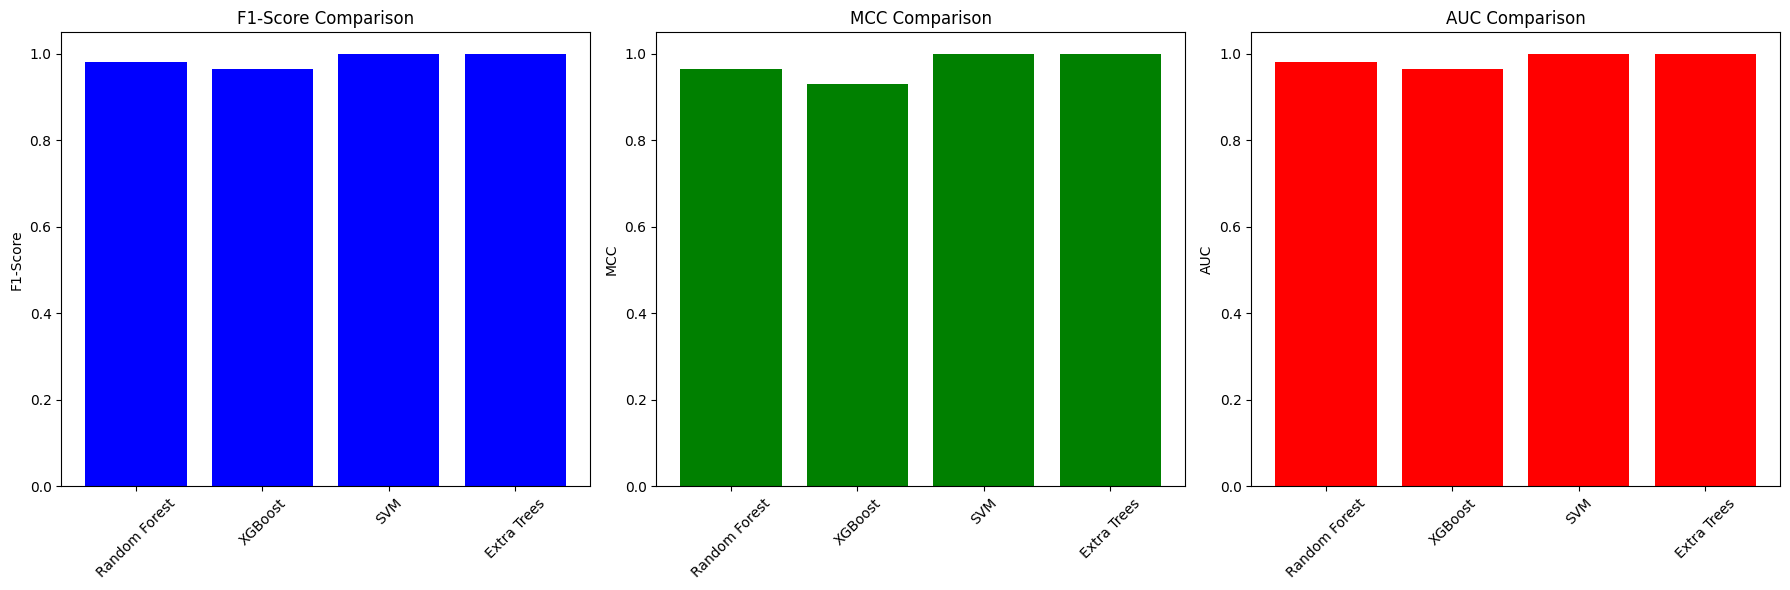

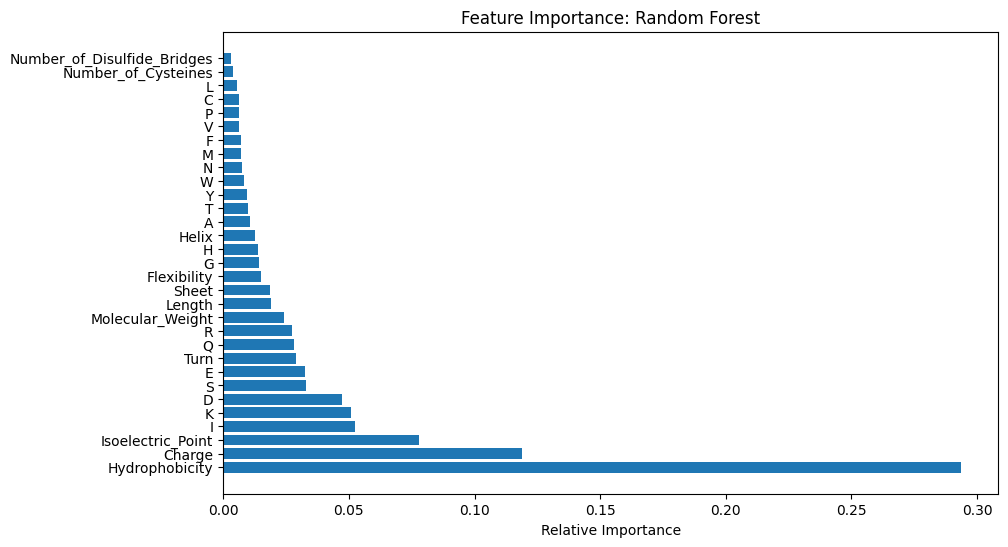

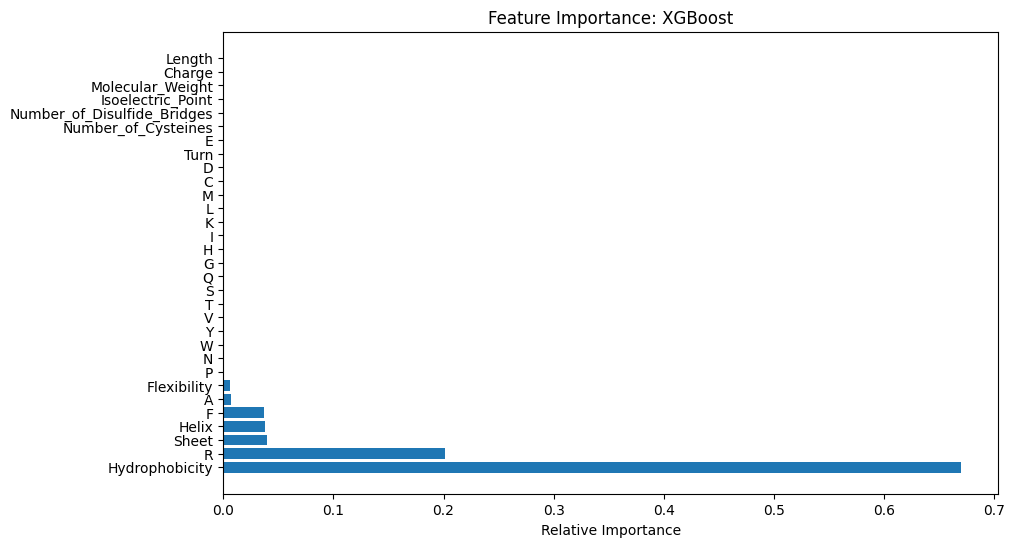

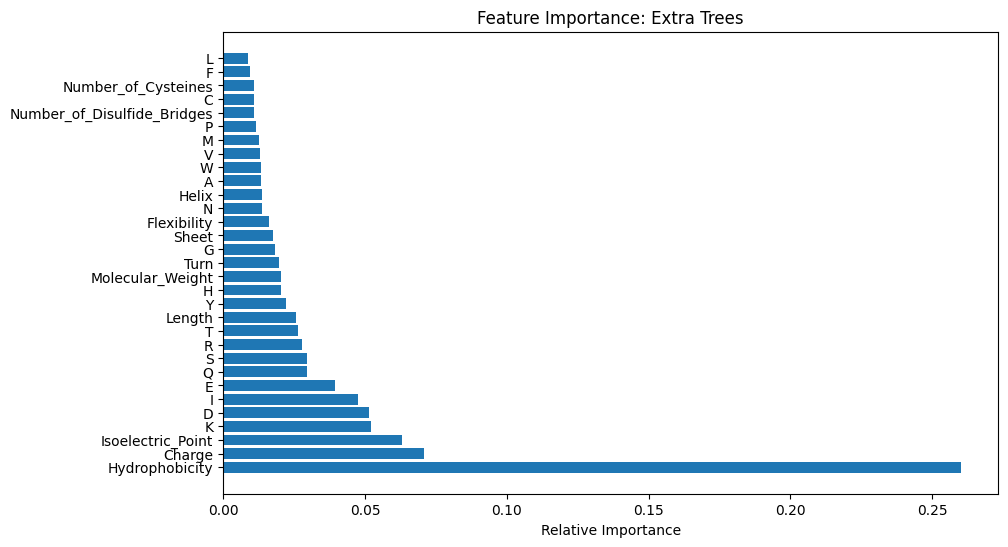

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, matthews_corrcoef, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

# Load the already separated datasets
X_train_klebsiella = pd.read_csv('/content/X_train_klebsiella.csv')
y_train_klebsiella = pd.read_csv('/content/y_train_klebsiella.csv')
X_test_klebsiella = pd.read_csv('/content/X_test_klebsiella.csv')
y_test_klebsiella = pd.read_csv('/content/y_test_klebsiella.csv')

# Standardize the features (important for models like logistic regression and XGBoost)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_klebsiella)
X_test_scaled = scaler.transform(X_test_klebsiella)

# Initialize models
rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42)
svm_model = SVC(probability=True, random_state=42)
ext_model = ExtraTreesClassifier(random_state=42)

# List of models to evaluate
models = {
    'Random Forest': rf_model,
    'XGBoost': xgb_model,
    'SVM': svm_model,
    'Extra Trees': ext_model
}

# Define function to calculate metrics
def calculate_metrics(y_true, y_pred):
    # Confusion Matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    # Sensitivity (Recall for class 1)
    sensitivity = tp / (tp + fn)

    # Specificity (Recall for class 0)
    specificity = tn / (tn + fp)

    # Precision
    precision = precision_score(y_true, y_pred)

    # Recall
    recall = recall_score(y_true, y_pred)

    # F1-Score
    f1 = f1_score(y_true, y_pred)

    # Matthews Correlation Coefficient (MCC)
    mcc = matthews_corrcoef(y_true, y_pred)

    # ROC-AUC
    auc = roc_auc_score(y_true, y_pred)

    return {
        'TN': tn, 'FP': fp, 'FN': fn, 'TP': tp,
        'Sensitivity': sensitivity, 'Specificity': specificity,
        'Precision': precision, 'Recall': recall,
        'F1 Score': f1, 'MCC': mcc, 'AUC': auc}

# Initialize a dictionary to store the metrics
model_metrics = {}

# Perform cross-validation and print results for each model
for model_name, model in models.items():
    print(f"\nEvaluating {model_name}")

    # Perform cross-validation (using 5-folds)
    cv_results = cross_validate(model, X_train_scaled, y_train_klebsiella.values.ravel(), cv=5, scoring='accuracy', return_estimator=True)

    print(f"Cross-validation accuracy scores: {cv_results['test_score']}")
    print(f"Mean cross-validation accuracy: {cv_results['test_score'].mean()}")

    # Fit model to the entire training data
    model.fit(X_train_scaled, y_train_klebsiella)

    # Make predictions on the test data
    y_pred = model.predict(X_test_scaled)

    # Calculate various evaluation metrics
    metrics = calculate_metrics(y_test_klebsiella, y_pred)
    model_metrics[model_name] = metrics

    # Display the confusion matrix and performance metrics
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test_klebsiella, y_pred))

    print("\nPerformance Metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")

# Plot Model Comparison: Accuracy, F1-Score, MCC, and AUC
model_names = list(model_metrics.keys())
accuracy = [metrics['F1 Score'] for metrics in model_metrics.values()]
mcc = [metrics['MCC'] for metrics in model_metrics.values()]
auc = [metrics['AUC'] for metrics in model_metrics.values()]

# Creating the plot for comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot Accuracy, F1-Score, and MCC comparison
axes[0].bar(model_names, accuracy, color='blue')
axes[0].set_title('F1-Score Comparison')
axes[0].set_ylabel('F1-Score')
axes[0].set_xticklabels(model_names, rotation=45)

axes[1].bar(model_names, mcc, color='green')
axes[1].set_title('MCC Comparison')
axes[1].set_ylabel('MCC')
axes[1].set_xticklabels(model_names, rotation=45)

axes[2].bar(model_names, auc, color='red')
axes[2].set_title('AUC Comparison')
axes[2].set_ylabel('AUC')
axes[2].set_xticklabels(model_names, rotation=45)

plt.tight_layout()
plt.show()

# Feature Importance Plot (only for tree-based models)
for model_name in ['Random Forest', 'XGBoost', 'Extra Trees']:
    model = models[model_name]
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]

        # Plot feature importance
        plt.figure(figsize=(10, 6))
        plt.title(f'Feature Importance: {model_name}')
        plt.barh(range(X_train_klebsiella.shape[1]), importances[indices], align="center")
        plt.yticks(range(X_train_klebsiella.shape[1]), X_train_klebsiella.columns[indices])
        plt.xlabel('Relative Importance')
        plt.show()


Evaluating Random Forest
Evaluating XGBoost
Evaluating SVM


<ipython-input-92-72d04f0bb1be>:58: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(model_metrics.keys(), rotation=45)
<ipython-input-92-72d04f0bb1be>:65: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(model_metrics.keys(), rotation=45)


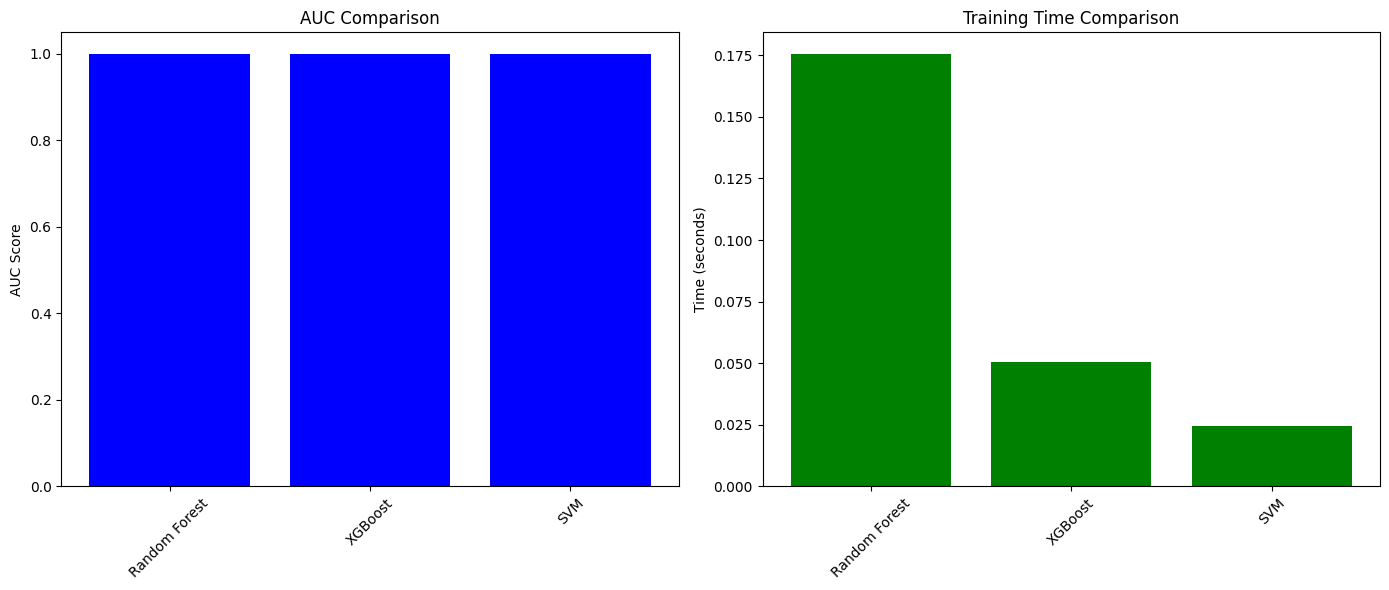

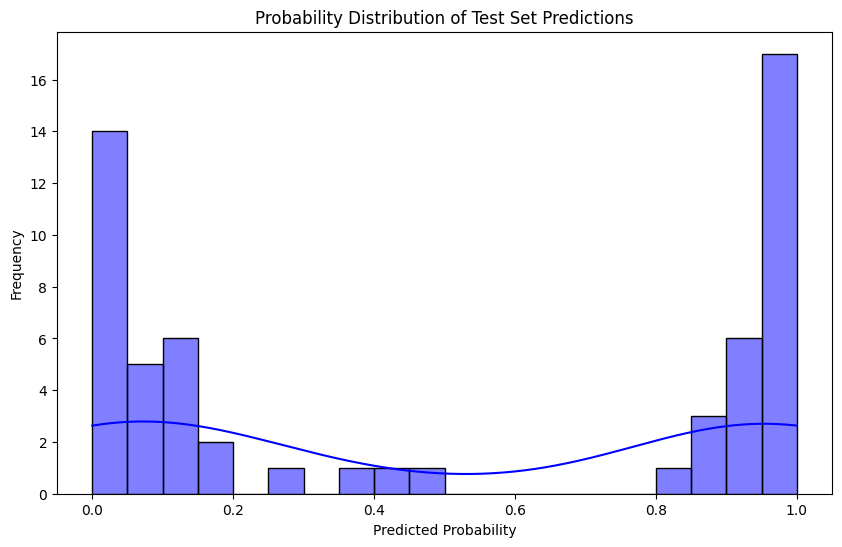

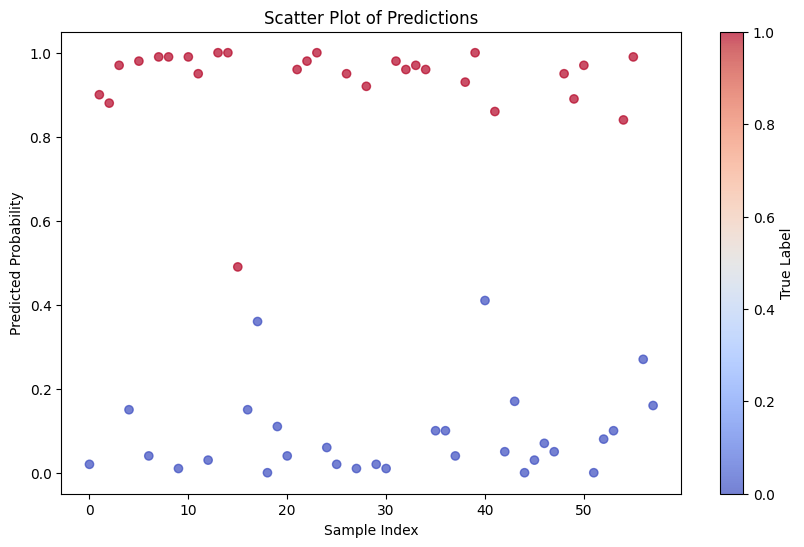

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score, matthews_corrcoef
import numpy as np
import time

# Load the already separated datasets
X_train_klebsiella = pd.read_csv('/content/X_train_klebsiella.csv')
y_train_klebsiella = pd.read_csv('/content/y_train_klebsiella.csv')
X_test_klebsiella = pd.read_csv('/content/X_test_klebsiella.csv')
y_test_klebsiella = pd.read_csv('/content/y_test_klebsiella.csv')

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_klebsiella)
X_test_scaled = scaler.transform(X_test_klebsiella)

# Initialize models
rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42)
svm_model = SVC(probability=True, random_state=42)


# List of models
models = {'Random Forest': rf_model, 'XGBoost': xgb_model, 'SVM': svm_model,}

# Initialize metrics dictionary
model_metrics = {}

# Evaluate models
for model_name, model in models.items():
    print(f"Evaluating {model_name}")
    start_time = time.time()
    model.fit(X_train_scaled, y_train_klebsiella.values.ravel())
    training_time = time.time() - start_time
    y_pred = model.predict(X_test_scaled)
    y_probs = model.predict_proba(X_test_scaled)[:, 1]

    auc_score = roc_auc_score(y_test_klebsiella, y_probs)

    # Collect metrics
    model_metrics[model_name] = {'AUC': auc_score, 'Training Time (s)': training_time}

# Plot AUC and Training Time
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# AUC Plot
auc_scores = [metrics['AUC'] for metrics in model_metrics.values()]
axes[0].bar(model_metrics.keys(), auc_scores, color='blue')
axes[0].set_title('AUC Comparison')
axes[0].set_ylabel('AUC Score')
axes[0].set_xticklabels(model_metrics.keys(), rotation=45)

# Training Time Plot
train_times = [metrics['Training Time (s)'] for metrics in model_metrics.values()]
axes[1].bar(model_metrics.keys(), train_times, color='green')
axes[1].set_title('Training Time Comparison')
axes[1].set_ylabel('Time (seconds)')
axes[1].set_xticklabels(model_metrics.keys(), rotation=45)

plt.tight_layout()
plt.show()

# Load model for prediction
selected_model = rf_model  # Example: Random Forest
selected_model.fit(X_train_scaled, y_train_klebsiella.values.ravel())
probs = selected_model.predict_proba(X_test_scaled)[:, 1]

# Plot probability distribution
plt.figure(figsize=(10, 6))
sns.histplot(probs, bins=20, kde=True, color='blue')
plt.title('Probability Distribution of Test Set Predictions')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.show()

# Scatter Plot of Predictions
plt.figure(figsize=(10, 6))
plt.scatter(range(len(probs)), probs, c=y_test_klebsiella.values.ravel(), cmap='coolwarm', alpha=0.7)
plt.title('Scatter Plot of Predictions')
plt.xlabel('Sample Index')
plt.ylabel('Predicted Probability')
plt.colorbar(label='True Label')
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


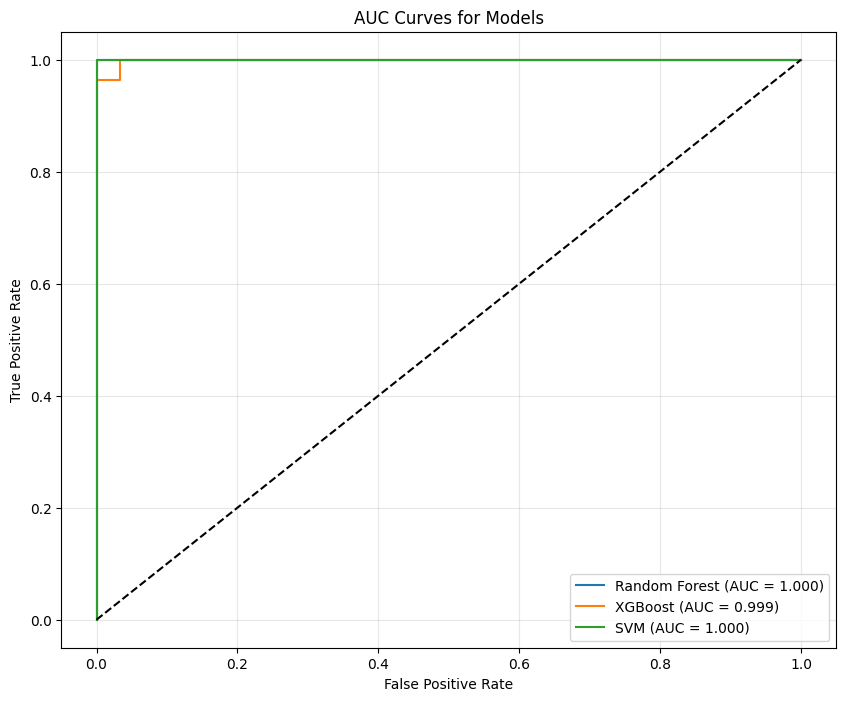

AUC scores:
           Random Forest   XGBoost       SVM
Train AUC       0.996937  0.999244  0.997353
Test AUC        1.000000  0.998810  1.000000


In [90]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Load the datasets
X_train_klebsiella = pd.read_csv('/content/X_train_klebsiella.csv')
y_train_klebsiella = pd.read_csv('/content/y_train_klebsiella.csv')
X_test_klebsiella = pd.read_csv('/content/X_test_klebsiella.csv')
y_test_klebsiella = pd.read_csv('/content/y_test_klebsiella.csv')

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_klebsiella)
X_test_scaled = scaler.transform(X_test_klebsiella)

# Define the models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}

# Cross-validation settings
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Plot settings
plt.figure(figsize=(10, 8))

# Store AUC values
auc_scores = {}

for model_name, model in models.items():
    # Cross-validated probabilities for the training set
    y_train_pred_prob = cross_val_predict(model, X_train_scaled, y_train_klebsiella.values.ravel(), cv=cv, method='predict_proba')[:, 1]
    train_auc = roc_auc_score(y_train_klebsiella, y_train_pred_prob)

    # Fit model and predict probabilities for the test set
    model.fit(X_train_scaled, y_train_klebsiella)
    y_test_pred_prob = model.predict_proba(X_test_scaled)[:, 1]
    test_auc = roc_auc_score(y_test_klebsiella, y_test_pred_prob)

    # Save AUC scores
    auc_scores[model_name] = {'Train AUC': train_auc, 'Test AUC': test_auc}

    # Plot AUC curve for the test set
    fpr, tpr, _ = roc_curve(y_test_klebsiella, y_test_pred_prob)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {test_auc:.3f})')

# Plot settings
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC Curves for Models')
plt.legend()
plt.grid(alpha=0.3)
plt.savefig('/content/drive/MyDrive/KP Model/AUC_Comparison.png')
plt.show()

# Save probability predictions for test set
prob_df = pd.DataFrame({
    'RandomForest_Prob': models['Random Forest'].predict_proba(X_test_scaled)[:, 1],
    'XGBoost_Prob': models['XGBoost'].predict_proba(X_test_scaled)[:, 1],
    'SVM_Prob': models['SVM'].predict_proba(X_test_scaled)[:, 1],
    'Actual': y_test_klebsiella.values.ravel()
})
prob_df.to_csv('/content/drive/MyDrive/KP Model/Test_Probabilities.csv', index=False)

print("AUC scores:")
print(pd.DataFrame(auc_scores))


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


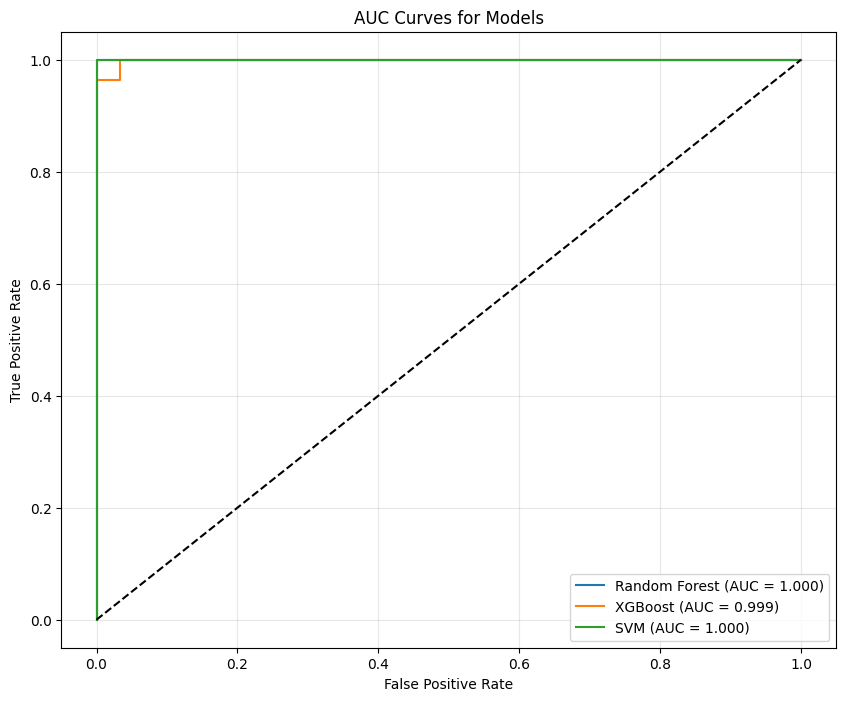

AUC scores:
           Random Forest   XGBoost       SVM
Train AUC       0.996937  0.999244  0.997353
Test AUC        1.000000  0.998810  1.000000


In [96]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Load the datasets
X_train_klebsiella = pd.read_csv('/content/X_train_klebsiella.csv')
y_train_klebsiella = pd.read_csv('/content/y_train_klebsiella.csv')
X_test_klebsiella = pd.read_csv('/content/X_test_klebsiella.csv')
y_test_klebsiella = pd.read_csv('/content/y_test_klebsiella.csv')

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_klebsiella)
X_test_scaled = scaler.transform(X_test_klebsiella)

# Define the models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}

# Cross-validation settings
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Plot settings
plt.figure(figsize=(10, 8))

# Store AUC values
auc_scores = {}

for model_name, model in models.items():
    # Cross-validated probabilities for the training set
    y_train_pred_prob = cross_val_predict(model, X_train_scaled, y_train_klebsiella.values.ravel(), cv=cv, method='predict_proba')[:, 1]
    train_auc = roc_auc_score(y_train_klebsiella, y_train_pred_prob)

    # Fit model and predict probabilities for the test set
    model.fit(X_train_scaled, y_train_klebsiella)
    y_test_pred_prob = model.predict_proba(X_test_scaled)[:, 1]
    test_auc = roc_auc_score(y_test_klebsiella, y_test_pred_prob)

    # Save AUC scores
    auc_scores[model_name] = {'Train AUC': train_auc, 'Test AUC': test_auc}

    # Plot AUC curve for the test set
    fpr, tpr, _ = roc_curve(y_test_klebsiella, y_test_pred_prob)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {test_auc:.3f})')

# Plot settings
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC Curves for Models')
plt.legend()
plt.grid(alpha=0.3)
plt.savefig('/content/drive/MyDrive/KP Model/AUC_Comparison.png')
plt.show()

# Save probability predictions for test set
prob_df = pd.DataFrame({
    'RandomForest_Prob': models['Random Forest'].predict_proba(X_test_scaled)[:, 1],
    'XGBoost_Prob': models['XGBoost'].predict_proba(X_test_scaled)[:, 1],
    'SVM_Prob': models['SVM'].predict_proba(X_test_scaled)[:, 1],
    'Actual': y_test_klebsiella.values.ravel()
})
prob_df.to_csv('/content/drive/MyDrive/KP Model/Test_Probabilities.csv', index=False)

print("AUC scores:")
print(pd.DataFrame(auc_scores))




Evaluating SVM


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


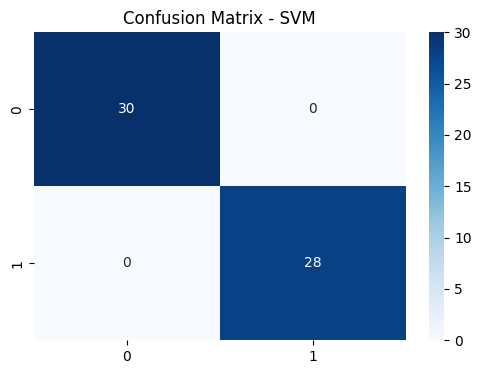


Evaluating Random Forest


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


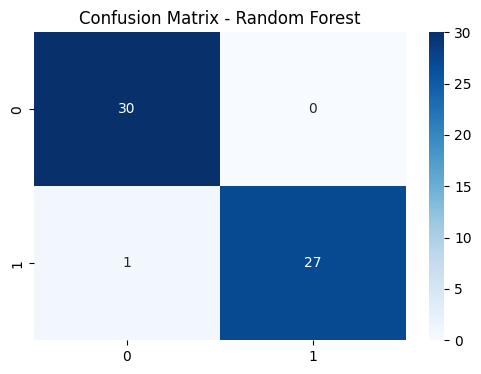


Evaluating XGBoost


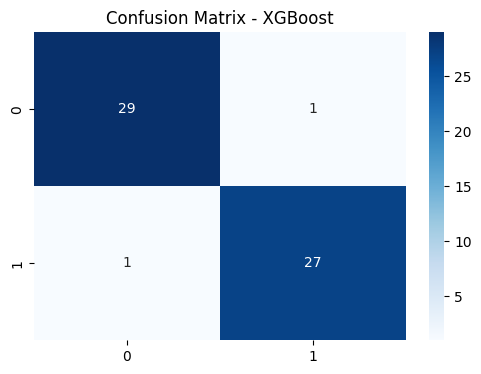

Metrics saved to /content/drive/MyDrive/KP Model/Confusion Matrix.csv


In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, matthews_corrcoef, roc_auc_score, precision_score, recall_score, f1_score
import numpy as np

# Load the already separated datasets
X_train_klebsiella = pd.read_csv('/content/X_train_klebsiella.csv')
y_train_klebsiella = pd.read_csv('/content/y_train_klebsiella.csv')
X_test_klebsiella = pd.read_csv('/content/X_test_klebsiella.csv')
y_test_klebsiella = pd.read_csv('/content/y_test_klebsiella.csv')

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_klebsiella)
X_test_scaled = scaler.transform(X_test_klebsiella)

# Initialize models
svm_model = SVC(probability=True, random_state=42)
rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42)

# Models dictionary
models = {'SVM': svm_model, 'Random Forest': rf_model, 'XGBoost': xgb_model}

# Function to calculate metrics
def calculate_metrics(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    mcc = matthews_corrcoef(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred)
    return {'TN': tn, 'FP': fp, 'FN': fn, 'TP': tp, 'Sensitivity': sensitivity, 'Specificity': specificity, 'Precision': precision, 'Recall': recall, 'F1 Score': f1, 'MCC': mcc, 'AUC': auc}

# Collect metrics for all models
model_metrics = {}

for model_name, model in models.items():
    print(f"\nEvaluating {model_name}")
    model.fit(X_train_scaled, y_train_klebsiella)
    y_pred = model.predict(X_test_scaled)
    y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]
    metrics = calculate_metrics(y_test_klebsiella, y_pred)
    model_metrics[model_name] = metrics

    # Confusion Matrix Heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test_klebsiella, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# Save all metrics to a CSV file
metrics_df = pd.DataFrame(model_metrics).T
metrics_df.to_csv('/content/drive/MyDrive/KP Model/Confusion Matrix.csv')
print("Metrics saved to /content/drive/MyDrive/KP Model/Confusion Matrix.csv")


In [107]:
# Adjust the threshold for classifying as active (class 1)
threshold = 0.5  # Change this value as needed
y_pred_adjusted = (y_pred_prob > threshold).astype(int)  # Convert probabilities to binary predictions based on threshold

# Calculate the confusion matrix and other metrics with adjusted threshold
metrics_adjusted = calculate_metrics(y_test_klebsiella, y_pred_adjusted)

# Display the adjusted metrics
print("\nAdjusted Performance Metrics (Threshold = 0.5):")
for metric, value in metrics_adjusted.items():
    print(f"{metric}: {value}")



Adjusted Performance Metrics (Threshold = 0.5):
TN: 29
FP: 1
FN: 1
TP: 27
Sensitivity: 0.9642857142857143
Specificity: 0.9666666666666667
Precision: 0.9642857142857143
Recall: 0.9642857142857143
F1 Score: 0.9642857142857143
MCC: 0.930952380952381
AUC: 0.9654761904761906



==== svm_model ====
Cross-validation accuracy: [0.97826087 0.95652174 0.95652174 1.         0.97826087]
Mean CV accuracy: 0.9739


<Figure size 1000x800 with 0 Axes>

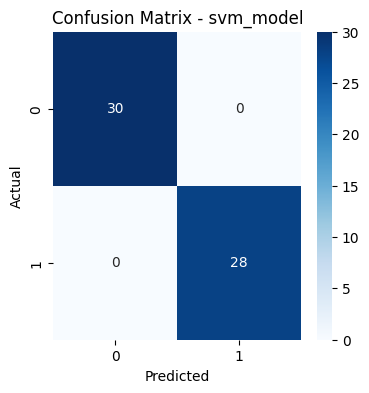


==== Random Forest ====
Cross-validation accuracy: [0.97826087 1.         0.97826087 0.97826087 1.        ]
Mean CV accuracy: 0.9870


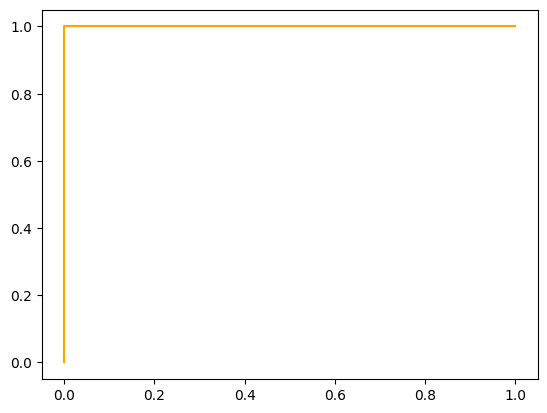

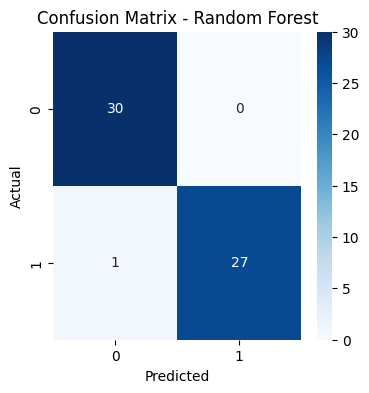


==== XGBoost ====
Cross-validation accuracy: [0.95652174 1.         0.95652174 1.         1.        ]
Mean CV accuracy: 0.9826


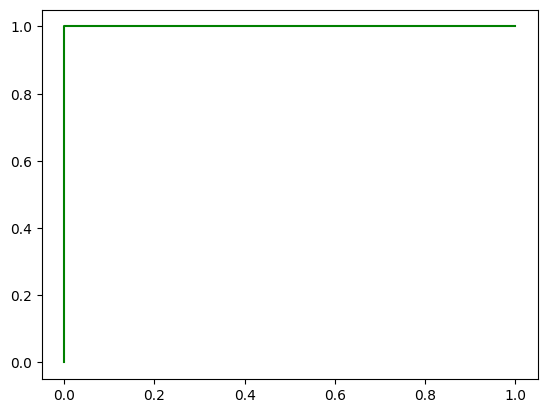

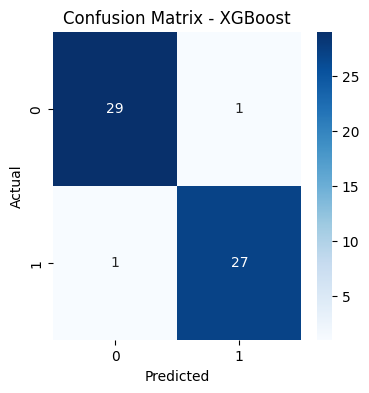

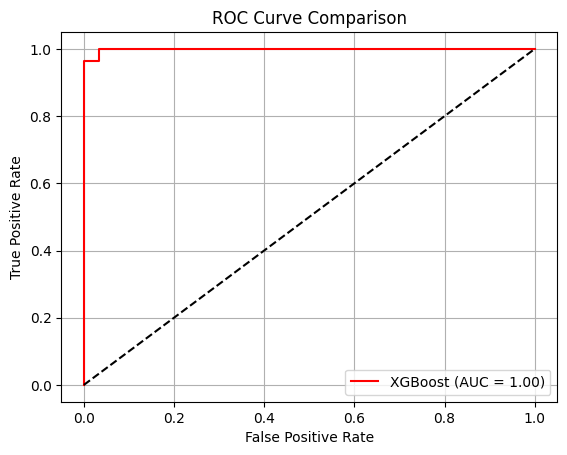

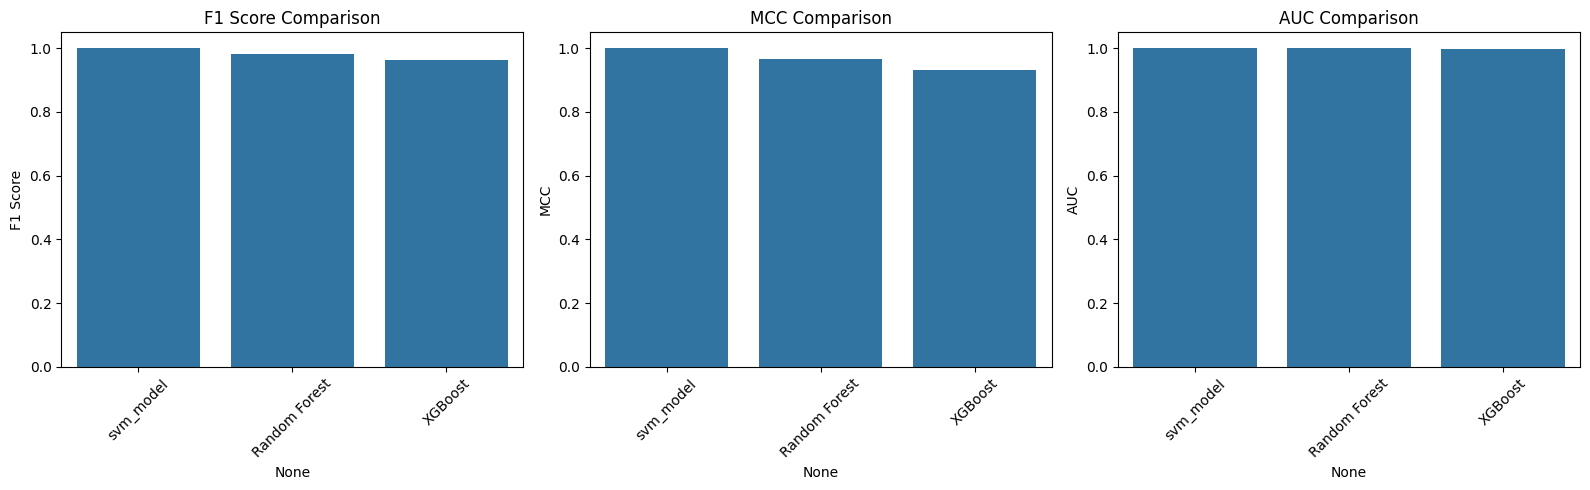

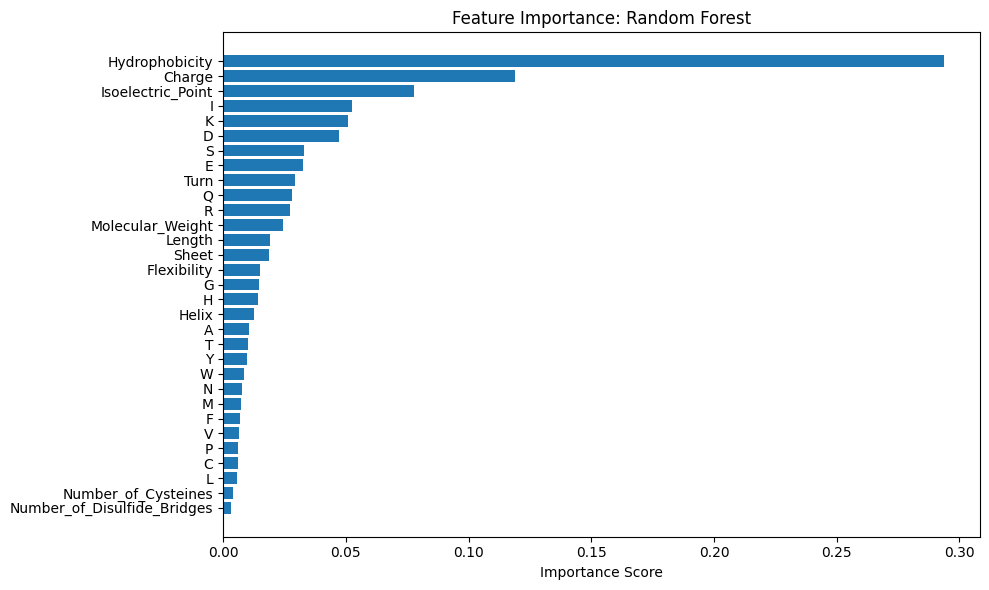

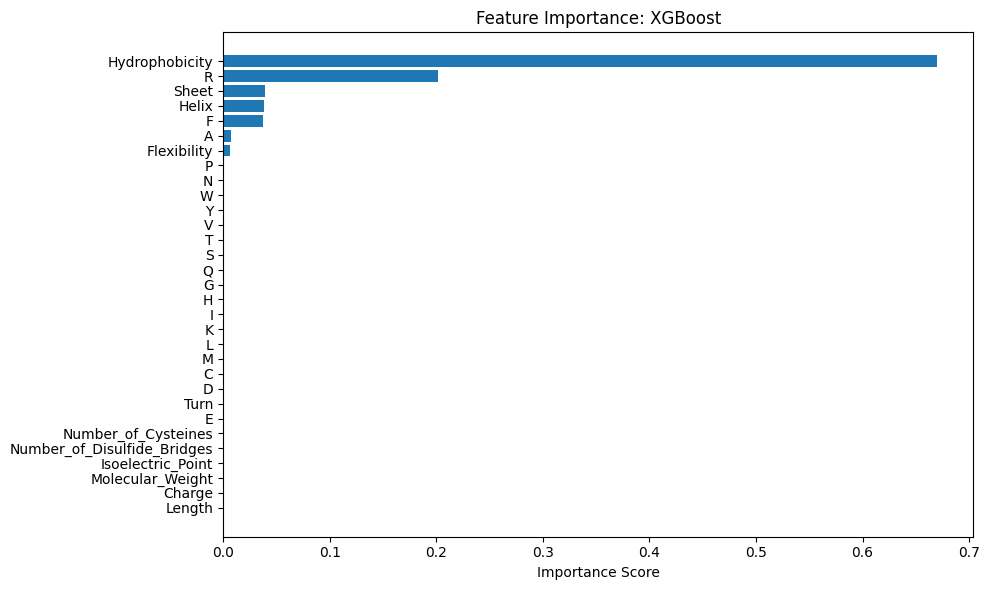

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (classification_report, confusion_matrix, matthews_corrcoef,
                             roc_auc_score, precision_score, recall_score, f1_score, roc_curve)
import numpy as np

# Load the data
X_train_klebsiella = pd.read_csv('/content/X_train_klebsiella.csv')
y_train_klebsiella = pd.read_csv('/content/y_train_klebsiella.csv')
X_test_klebsiella = pd.read_csv('/content/X_test_klebsiella.csv')
y_test_klebsiella = pd.read_csv('/content/y_test_klebsiella.csv')

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_klebsiella)
X_test_scaled = scaler.transform(X_test_klebsiella)

# Initialize models
models = {
    'svm_model': SVC(probability=True, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),

}

# Function to calculate metrics
def calculate_metrics(y_true, y_pred, y_prob):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    mcc = matthews_corrcoef(y_true, y_pred)
    auc = roc_auc_score(y_true, y_prob)

    return {
        'TN': tn, 'FP': fp, 'FN': fn, 'TP': tp,
        'Sensitivity': sensitivity, 'Specificity': specificity,
        'Precision': precision, 'Recall': recall,
        'F1 Score': f1, 'MCC': mcc, 'AUC': auc
    }

model_metrics = {}
plt.figure(figsize=(10, 8))
# Colors for ROC curve
colors = {'Random Forest': 'green', 'XGBoost': 'red', 'svm_model':'orange'}

# Evaluate each model
for model_name, model in models.items():
    print(f"\n==== {model_name} ====")

    # Cross-validation
    cv_results = cross_validate(model, X_train_scaled, y_train_klebsiella.values.ravel(), cv=5, scoring='accuracy')
    print(f"Cross-validation accuracy: {cv_results['test_score']}")
    print(f"Mean CV accuracy: {cv_results['test_score'].mean():.4f}")

    # Train and predict
    model.fit(X_train_scaled, y_train_klebsiella.values.ravel())
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]

    # Metrics
    metrics = calculate_metrics(y_test_klebsiella.values.ravel(), y_pred, y_prob)
    model_metrics[model_name] = metrics

    # Confusion Matrix Heatmap
    plt.figure(figsize=(4, 4))
    sns.heatmap(confusion_matrix(y_test_klebsiella, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test_klebsiella.values.ravel(), y_prob)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {metrics["AUC"]:.2f})', color=colors[model_name])

# Final ROC plot
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Bar Chart Comparison
metrics_df = pd.DataFrame(model_metrics).T
plt.figure(figsize=(16, 5))
for i, metric in enumerate(['F1 Score', 'MCC', 'AUC']):
    plt.subplot(1, 3, i+1)
    sns.barplot(x=metrics_df.index, y=metrics_df[metric])
    plt.title(f'{metric} Comparison')
    plt.xticks(rotation=45)
    plt.ylabel(metric)
plt.tight_layout()
plt.show()


# Tree-based model feature importance
for model_name in ['Random Forest', 'XGBoost']:
    model = models[model_name]
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(10, 6))
    plt.title(f'Feature Importance: {model_name}')
    plt.barh(range(len(indices)), importances[indices], align='center')
    plt.yticks(range(len(indices)), X_train_klebsiella.columns[indices])
    plt.gca().invert_yaxis()
    plt.xlabel('Importance Score')
    plt.tight_layout()
    plt.show()

# Save model metrics to CSV
metrics_df.to_csv('model_comparison_metrics.csv')


==== svm_model ====
Cross-validation accuracy: [0.97826087 0.95652174 0.95652174 1.         0.97826087]
Mean CV accuracy: 0.9739

==== Random Forest ====
Cross-validation accuracy: [0.97826087 1.         0.97826087 0.97826087 1.        ]
Mean CV accuracy: 0.9870

==== XGBoost ====
Cross-validation accuracy: [0.95652174 1.         0.95652174 1.         1.        ]
Mean CV accuracy: 0.9826

Evaluating svm_model

Predicted probabilities and classification (cutoff = 0.5):
Instance 1: Probability of being active (1): 0.0055 -> Classified as: Inactive
Instance 2: Probability of being active (1): 0.9903 -> Classified as: Active
Instance 3: Probability of being active (1): 0.9925 -> Classified as: Active
Instance 4: Probability of being active (1): 0.9803 -> Classified as: Active
Instance 5: Probability of being active (1): 0.1356 -> Classified as: Inactive
Instance 6: Probability of being active (1): 0.9964 -> Classified as: Active
Instance 7: Probability of being active (1): 0.0062 -> Class

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



Predicted probabilities and classification (cutoff = 0.5):
Instance 1: Probability of being active (1): 0.0200 -> Classified as: Inactive
Instance 2: Probability of being active (1): 0.9000 -> Classified as: Active
Instance 3: Probability of being active (1): 0.8800 -> Classified as: Active
Instance 4: Probability of being active (1): 0.9700 -> Classified as: Active
Instance 5: Probability of being active (1): 0.1500 -> Classified as: Inactive
Instance 6: Probability of being active (1): 0.9800 -> Classified as: Active
Instance 7: Probability of being active (1): 0.0400 -> Classified as: Inactive
Instance 8: Probability of being active (1): 0.9900 -> Classified as: Active
Instance 9: Probability of being active (1): 0.9900 -> Classified as: Active
Instance 10: Probability of being active (1): 0.0100 -> Classified as: Inactive

Confusion Matrix:
[[30  0]
 [ 1 27]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98 

<Figure size 1000x800 with 0 Axes>

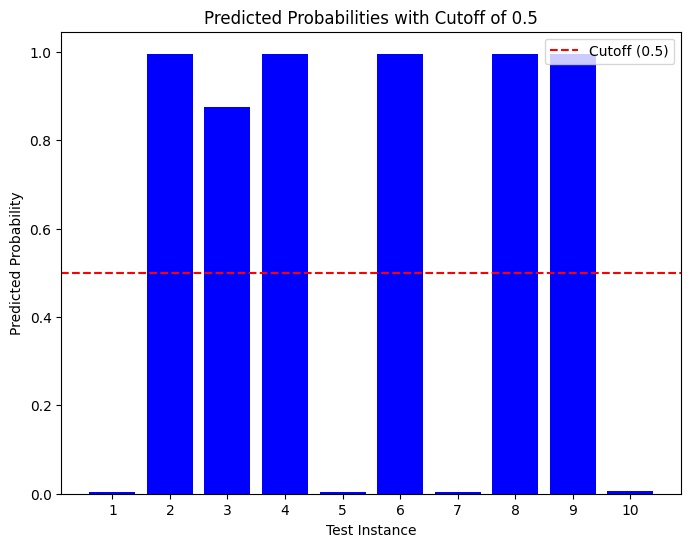

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (classification_report, confusion_matrix, matthews_corrcoef,
                             roc_auc_score, precision_score, recall_score, f1_score, roc_curve)
import numpy as np

# Load the data
X_train_klebsiella = pd.read_csv('/content/X_train_klebsiella.csv')
y_train_klebsiella = pd.read_csv('/content/y_train_klebsiella.csv')
X_test_klebsiella = pd.read_csv('/content/X_test_klebsiella.csv')
y_test_klebsiella = pd.read_csv('/content/y_test_klebsiella.csv')

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_klebsiella)
X_test_scaled = scaler.transform(X_test_klebsiella)

# Initialize models
models = {
    'svm_model': SVC(probability=True, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),

}

# Function to calculate metrics
def calculate_metrics(y_true, y_pred, y_prob):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    mcc = matthews_corrcoef(y_true, y_pred)
    auc = roc_auc_score(y_true, y_prob)

    return {
        'TN': tn, 'FP': fp, 'FN': fn, 'TP': tp,
        'Sensitivity': sensitivity, 'Specificity': specificity,
        'Precision': precision, 'Recall': recall,
        'F1 Score': f1, 'MCC': mcc, 'AUC': auc
    }

model_metrics = {}
plt.figure(figsize=(10, 8))
# Colors for ROC curve
colors = {'Random Forest': 'green', 'XGBoost': 'red', 'svm_model':'orange'}

# Evaluate each model
for model_name, model in models.items():
    print(f"\n==== {model_name} ====")

    # Cross-validation
    cv_results = cross_validate(model, X_train_scaled, y_train_klebsiella.values.ravel(), cv=5, scoring='accuracy')
    print(f"Cross-validation accuracy: {cv_results['test_score']}")
    print(f"Mean CV accuracy: {cv_results['test_score'].mean():.4f}")

    # Train and predict
    model.fit(X_train_scaled, y_train_klebsiella.values.ravel())
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]

# Perform cross-validation and print results for each model
for model_name, model in models.items():
    print(f"\nEvaluating {model_name}")

    # Fit model to the entire training data
    model.fit(X_train_scaled, y_train_klebsiella)

    # Make predictions on the test data
    y_pred = model.predict(X_test_scaled)

    # Calculate probabilities for 'Activity = 1' (second column of the predicted probabilities)
    y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]

    # Show predicted probabilities and final classification based on cutoff of 0.5
    print("\nPredicted probabilities and classification (cutoff = 0.5):")
    for i, prob in enumerate(y_pred_prob[:10]):  # Show for the first 10 instances
        predicted_class = 1 if prob > 0.5 else 0
        print(f"Instance {i+1}: Probability of being active (1): {prob:.4f} -> Classified as: {'Active' if predicted_class == 1 else 'Inactive'}")

    # Display the confusion matrix and performance metrics
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test_klebsiella, y_pred))

    print("\nClassification Report:")
    print(classification_report(y_test_klebsiella, y_pred))

# Example to plot probabilities and classifications for the first few test instances
import matplotlib.pyplot as plt

# Create a DataFrame for probabilities and their predicted class
prob_df = pd.DataFrame({
    'Instance': range(1, 11),  # First 10 instances
    'Predicted Probability': y_pred_prob[:10],
    'Predicted Class': ['Active' if prob > 0.5 else 'Inactive' for prob in y_pred_prob[:10]]
})

# Plot the predicted probabilities and classifications
plt.figure(figsize=(8, 6))
plt.bar(prob_df['Instance'], prob_df['Predicted Probability'], color='blue')
plt.axhline(y=0.5, color='r', linestyle='--', label='Cutoff (0.5)')  # Add a line for cutoff at 0.5
plt.xlabel('Test Instance')
plt.ylabel('Predicted Probability')
plt.title('Predicted Probabilities with Cutoff of 0.5')
plt.xticks(prob_df['Instance'])
plt.legend()
plt.show()


In [119]:
# -----------------------------
# Import Libraries
# -----------------------------
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             confusion_matrix, roc_auc_score, roc_curve)
import matplotlib.pyplot as plt
import seaborn as sns

# Classifiers
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

# -----------------------------
# Load Data
X_train = pd.read_csv('/content/X_train_klebsiella.csv')
y_train = pd.read_csv('/content/y_train_klebsiella.csv')
X_test = pd.read_csv('/content/X_test_klebsiella.csv')
y_test = pd.read_csv('/content/y_test_klebsiella.csv')



print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")

# -----------------------------
# Scaling
# -----------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -----------------------------
# Model Definitions
# -----------------------------
models = {
    'Random Forest': RandomForestClassifier(n_estimators=200, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'SVM': SVC(kernel='rbf', probability=True, random_state=42)
}

# -----------------------------
# Evaluation Function
# -----------------------------
def evaluate_model(model, X_test, y_test, name):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)

    fpr, tpr, _ = roc_curve(y_test, y_proba)

    metrics = {
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1': f1,
        'AUC': auc,
        'Sensitivity': sensitivity,
        'Specificity': specificity
    }

    return metrics, (fpr, tpr), y_proba

# -----------------------------
# Train, Evaluate, Compare
# -----------------------------
results = []
roc_curves = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    metrics, roc_data, y_proba = evaluate_model(model, X_test_scaled, y_test, name)
    results.append(metrics)
    roc_curves[name] = roc_data

# -----------------------------
# Show Evaluation Table
# -----------------------------
results_df = pd.DataFrame(results).sort_values(by='AUC', ascending=False)
print("\nModel Comparison:\n")
print(results_df)



Training samples: 230, Testing samples: 58


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



Model Comparison:

           Model  Accuracy  Precision    Recall        F1      AUC  \
0  Random Forest  0.982759   1.000000  0.964286  0.981818  1.00000   
2            SVM  1.000000   1.000000  1.000000  1.000000  1.00000   
1        XGBoost  0.965517   0.964286  0.964286  0.964286  0.99881   

   Sensitivity  Specificity  
0     0.964286     1.000000  
2     1.000000     1.000000  
1     0.964286     0.966667  


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:18:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Scaler saved at: /content/drive/MyDrive/KP Model/scaler.pkl

==== svm_model ====
Cross-validation accuracy: [0.97826087 0.95652174 0.95652174 1.         0.97826087]
Mean CV accuracy: 0.9739
Model saved at: /content/drive/MyDrive/KP Model/svm_model.pkl

==== Random Forest ====
Cross-validation accuracy: [0.97826087 1.         0.97826087 0.97826087 1.        ]
Mean CV accuracy: 0.9870
Model saved at: /content/drive/MyDrive/KP Model/Random Forest.pkl

==== XGBoost ====
Cross-validation accuracy: [0.95652174 1.         0.95652174 1.         1.        ]
Mean CV accuracy: 0.9826
Model saved at: /content/drive/MyDrive/KP Model/XGBoost.pkl
ROC Curve saved at: /content/drive/MyDrive/KP Model/ROC_Curve_Comparison.png


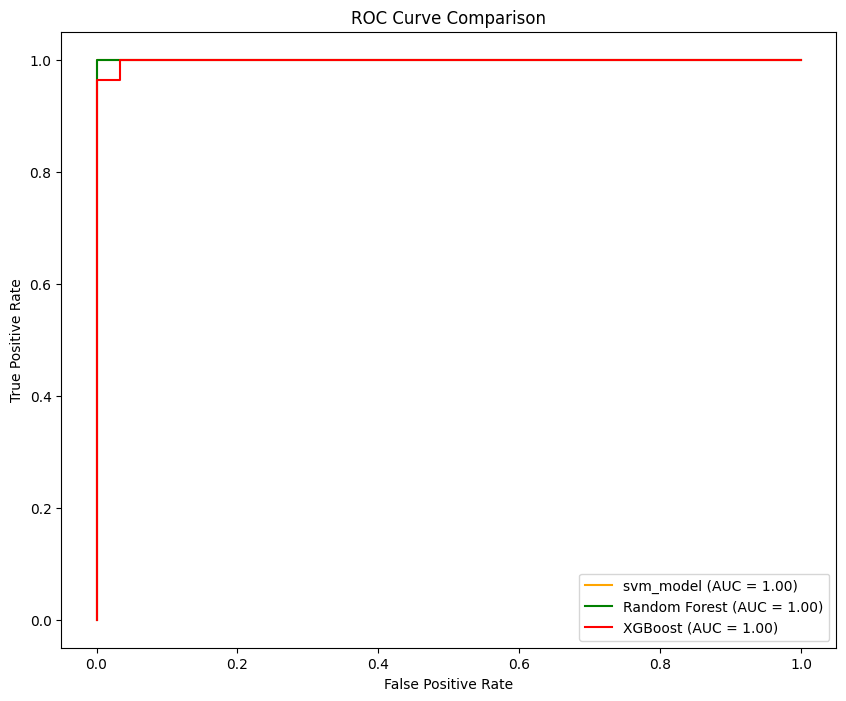

Confusion Matrix saved at: /content/drive/MyDrive/KP Model/svm_model_Confusion_Matrix.png


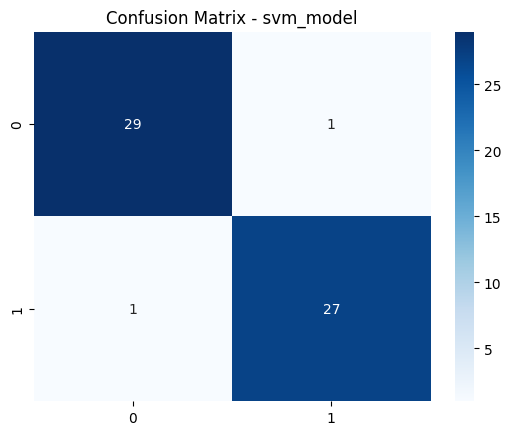

Confusion Matrix saved at: /content/drive/MyDrive/KP Model/Random Forest_Confusion_Matrix.png


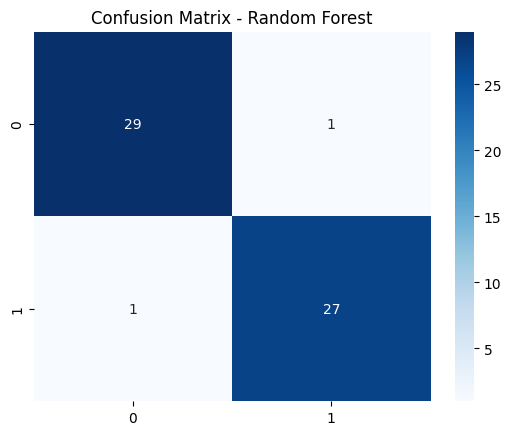

Confusion Matrix saved at: /content/drive/MyDrive/KP Model/XGBoost_Confusion_Matrix.png


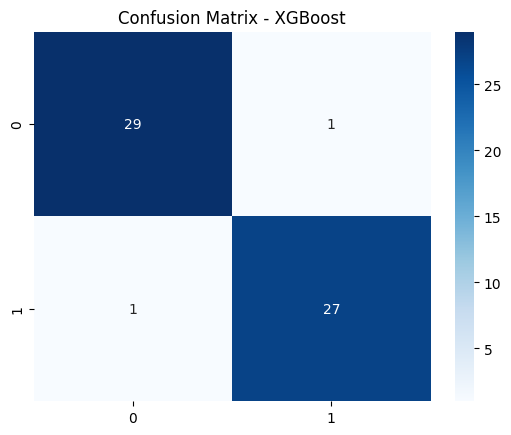

Metrics saved at: /content/drive/MyDrive/KP Model/Model_Metrics.csv


In [122]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (classification_report, confusion_matrix, matthews_corrcoef,
                             roc_auc_score, precision_score, recall_score, f1_score, roc_curve)
import numpy as np

# Directory to save the models and plots
save_dir = '/content/drive/MyDrive/KP Model'
os.makedirs(save_dir, exist_ok=True)

# Load the data
X_train_klebsiella = pd.read_csv('/content/X_train_klebsiella.csv')
y_train_klebsiella = pd.read_csv('/content/y_train_klebsiella.csv')
X_test_klebsiella = pd.read_csv('/content/X_test_klebsiella.csv')
y_test_klebsiella = pd.read_csv('/content/y_test_klebsiella.csv')

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_klebsiella)
X_test_scaled = scaler.transform(X_test_klebsiella)

# Save the scaler
scaler_path = os.path.join(save_dir, 'scaler.pkl')
joblib.dump(scaler, scaler_path)
print(f"Scaler saved at: {scaler_path}")

# Initialize models
models = {
    'svm_model': SVC(probability=True, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
}

# Function to calculate metrics
def calculate_metrics(y_true, y_pred, y_prob):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    mcc = matthews_corrcoef(y_true, y_pred)
    auc = roc_auc_score(y_true, y_prob)

    return {
        'TN': tn, 'FP': fp, 'FN': fn, 'TP': tp,
        'Sensitivity': sensitivity, 'Specificity': specificity,
        'Precision': precision, 'Recall': recall,
        'F1 Score': f1, 'MCC': mcc, 'AUC': auc
    }

model_metrics = {}
plt.figure(figsize=(10, 8))

# Colors for ROC curve
colors = {'Random Forest': 'green', 'XGBoost': 'red', 'svm_model': 'orange'}

# Evaluate each model
for model_name, model in models.items():
    print(f"\n==== {model_name} ====")

    # Cross-validation
    cv_results = cross_validate(model, X_train_scaled, y_train_klebsiella.values.ravel(), cv=5, scoring='accuracy')
    print(f"Cross-validation accuracy: {cv_results['test_score']}")
    print(f"Mean CV accuracy: {cv_results['test_score'].mean():.4f}")

    # Train and predict
    model.fit(X_train_scaled, y_train_klebsiella.values.ravel())
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]

    # Save the model
    model_path = os.path.join(save_dir, f"{model_name}.pkl")
    joblib.dump(model, model_path)
    print(f"Model saved at: {model_path}")

    # Calculate metrics
    metrics = calculate_metrics(y_test_klebsiella, y_pred, y_prob)
    model_metrics[model_name] = metrics

    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_test_klebsiella, y_prob)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {metrics['AUC']:.2f})", color=colors[model_name])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
roc_path = os.path.join(save_dir, 'ROC_Curve_Comparison.png')
plt.savefig(roc_path)
print(f"ROC Curve saved at: {roc_path}")
plt.show()

# Confusion Matrix and Classification Report
for model_name, metrics in model_metrics.items():
    cm = confusion_matrix(y_test_klebsiella, model.predict(X_test_scaled))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    cm_path = os.path.join(save_dir, f"{model_name}_Confusion_Matrix.png")
    plt.savefig(cm_path)
    print(f"Confusion Matrix saved at: {cm_path}")
    plt.show()

# Save the metrics to CSV
metrics_df = pd.DataFrame(model_metrics).T
metrics_csv_path = os.path.join(save_dir, 'Model_Metrics.csv')
metrics_df.to_csv(metrics_csv_path)
print(f"Metrics saved at: {metrics_csv_path}")



🔍 SHAP Summary for: Logistic Regression


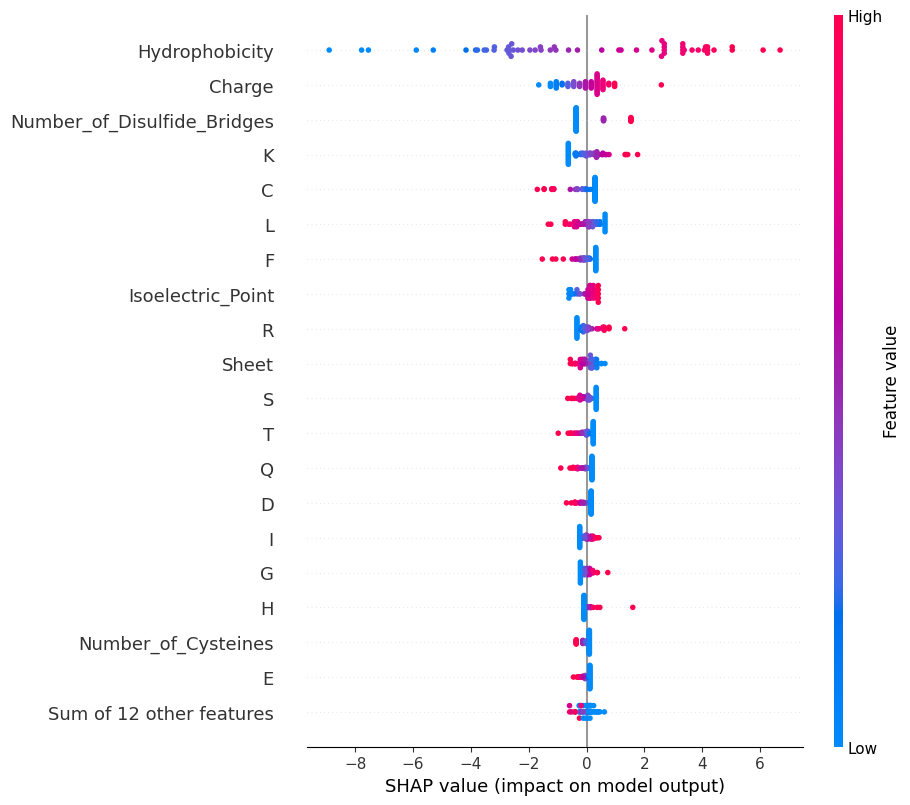

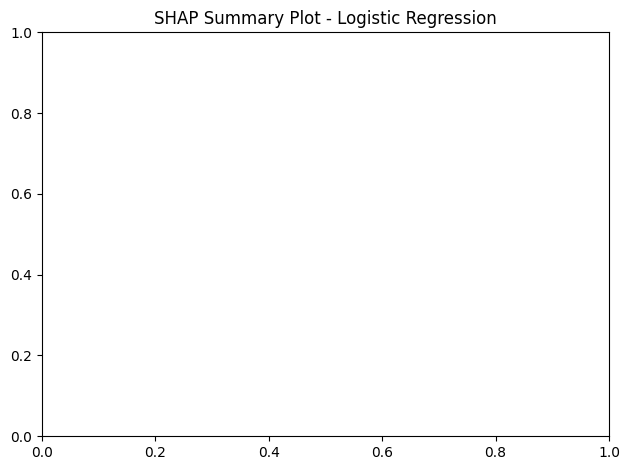


🔍 SHAP Summary for: Random Forest
❌ SHAP failed for Random Forest: The beeswarm plot does not support plotting explanations with instances that have more than one dimension!

🔍 SHAP Summary for: XGBoost


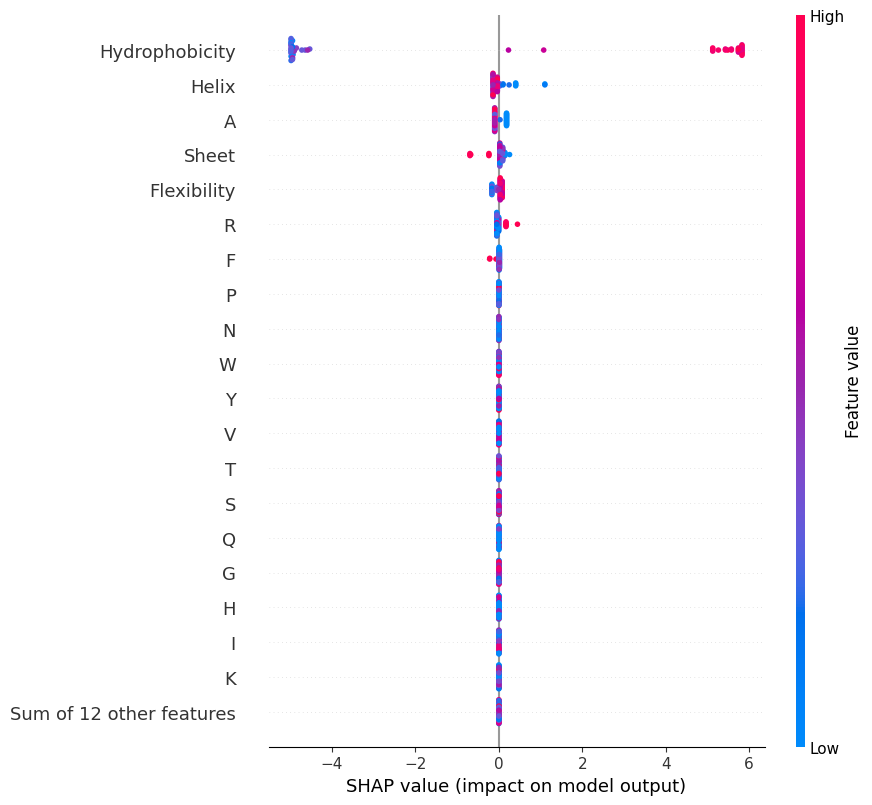

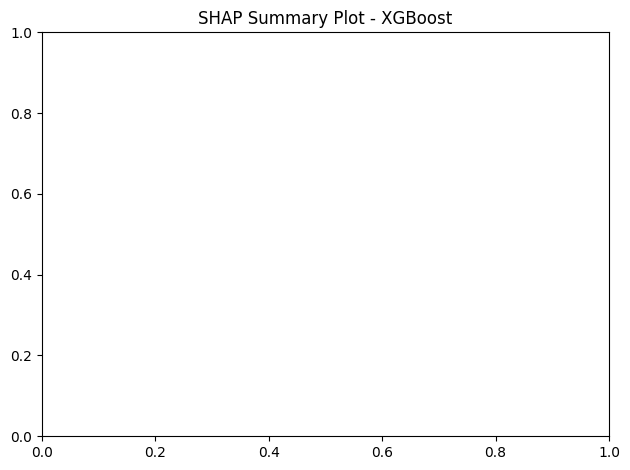


🔍 SHAP Summary for: SVM
❌ SHAP failed for SVM: The passed model is not callable and cannot be analyzed directly with the given masker! Model: SVC(probability=True, random_state=42)


In [123]:
import shap
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# SHAP Interpretation (on test set)
# -----------------------------
def shap_summary_plot(model, X_scaled, model_name, feature_names):
    try:
        # Convert scaled numpy array back to DataFrame with feature names
        X_df = pd.DataFrame(X_scaled, columns=feature_names)

        # Choose the appropriate explainer
        if model_name == 'XGBoost':
            explainer = shap.Explainer(model, X_df)
        elif model_name == 'Random Forest':
            explainer = shap.TreeExplainer(model)
        else:
            explainer = shap.Explainer(model, X_df)

        # Compute SHAP values and plot
        shap_values = explainer(X_df)
        shap.plots.beeswarm(shap_values, max_display=20, show=True)
        plt.title(f"SHAP Summary Plot - {model_name}")
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"❌ SHAP failed for {model_name}: {e}")

# -----------------------------
# Visualize SHAP (test set)
# -----------------------------
for model_name, model in trained_models.items():
    print(f"\n🔍 SHAP Summary for: {model_name}")
    shap_summary_plot(model, X_test_scaled, model_name, X_train.columns)


In [126]:
import pandas as pd
import numpy as np
import random
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
import joblib

# ----------------------------- Load Models -----------------------------

# Load trained models
rf_model = joblib.load('/content/drive/MyDrive/KP Model/Random Forest.pkl')
xgb_model = joblib.load('/content/drive/MyDrive/KP Model/XGBoost.pkl')
svm_model = joblib.load('/content/drive/MyDrive/KP Model/svm_model.pkl')

# ----------------------------- Load Data -----------------------------

# Load training data (for scaling)
X_train = pd.read_csv('/content/X_train_klebsiella.csv')
y_train = pd.read_csv('/content/y_train_klebsiella.csv')
inactive_df = pd.read_csv('/content/drive/MyDrive/KP/inactive_descriptors v1.1.csv')

# ----------------------------- Feature List -----------------------------

# List of features to be used for descriptors calculation
all_features = ['Hydrophobicity', 'R', 'Sheet', 'Helix', 'F', 'A', 'Flexibility',
                'Number_of_Disulfide_Bridges', 'Number_of_Cysteines', 'Isoelectric_Point',
                'Length', 'Charge', 'Molecular_Weight', 'Turn', 'K', 'Y', 'W', 'V', 'L',
                'H', 'S', 'T', 'G', 'C', 'N', 'P', 'E', 'D', 'Q', 'I', 'M']

# ----------------------------- Fit Scaler -----------------------------

# Scaling features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[all_features])

# ----------------------------- Guided Mutation Function -----------------------------

# Amino acid lists for mutation
priority_aas = ['R', 'F', 'A', 'K', 'W', 'Y']
hydrophobic_aas = ['A', 'V', 'I', 'L', 'M', 'F', 'W', 'Y']
all_aas = list('ACDEFGHIKLMNPQRSTVWY')

def guided_mutation(seq, n_mutations=3):
    """Randomly mutate sequence based on certain priorities."""
    seq = list(seq)
    positions = random.sample(range(len(seq)), min(n_mutations, len(seq)))
    for pos in positions:
        current_aa = seq[pos]
        if random.random() < 0.7:
            pool = list(set(priority_aas + hydrophobic_aas) - {current_aa})
        else:
            pool = list(set(all_aas) - {current_aa})
        seq[pos] = random.choice(pool)
    return ''.join(seq)

# ----------------------------- Descriptor Calculation -----------------------------

def calculate_descriptors(peptides):
    """Calculate descriptors for a list of peptide sequences."""
    data = []
    for seq in peptides:
        try:
            seq = seq.upper()
            analysis = ProteinAnalysis(seq)
            desc = {
                'Hydrophobicity': analysis.gravy(),
                'R': seq.count('R') / len(seq),
                'Sheet': analysis.secondary_structure_fraction()[1],
                'Helix': analysis.secondary_structure_fraction()[0],
                'F': seq.count('F') / len(seq),
                'A': seq.count('A') / len(seq),
                'Flexibility': np.mean(analysis.flexibility()) if len(seq) >= 9 else 0.0,
                'Number_of_Disulfide_Bridges': 0,
                'Number_of_Cysteines': seq.count('C'),
                'Isoelectric_Point': analysis.isoelectric_point(),
                'Length': len(seq),
                'Charge': analysis.charge_at_pH(7.0),
                'Molecular_Weight': analysis.molecular_weight(),
                'Turn': analysis.secondary_structure_fraction()[2],
                'K': seq.count('K') / len(seq),
                'Y': seq.count('Y') / len(seq),
                'W': seq.count('W') / len(seq),
                'V': seq.count('V') / len(seq),
                'L': seq.count('L') / len(seq),
                'H': seq.count('H') / len(seq),
                'S': seq.count('S') / len(seq),
                'T': seq.count('T') / len(seq),
                'G': seq.count('G') / len(seq),
                'C': seq.count('C') / len(seq),
                'N': seq.count('N') / len(seq),
                'P': seq.count('P') / len(seq),
                'E': seq.count('E') / len(seq),
                'D': seq.count('D') / len(seq),
                'Q': seq.count('Q') / len(seq),
                'I': seq.count('I') / len(seq),
                'M': seq.count('M') / len(seq)
            }
            data.append(desc)
        except:
            continue
    return pd.DataFrame(data)

# ----------------------------- Generate Mutants and Predict -----------------------------

# Filter inactive peptides with length <= 15
inactive_df = inactive_df[inactive_df['Length'] <= 15].copy()
inactive_seqs = inactive_df['Sequence'].tolist()

# Lists to store results
mutants, originals, logreg_probs, rf_probs, xgb_probs, svm_probs = [], [], [], [], [], []

# Generate mutants and predict their activity
for seq in inactive_seqs:
    for _ in range(5):  # Generate 5 mutants per original sequence
        mutated = guided_mutation(seq, n_mutations=4)
        desc = calculate_descriptors([mutated])
        if desc.empty:
            continue
        try:
            desc = desc[all_features]
            desc_scaled = scaler.transform(desc)

            # Predict with each model
            p1 = rf_model.predict_proba(desc_scaled)[0][1]
            p2 = xgb_model.predict_proba(desc_scaled)[0][1]
            p3 = svm_model.predict_proba(desc_scaled)[0][1]

            avg_prob = np.mean([p1, p2, p3])

            # If average probability >= 0.6, save the results
            if avg_prob >= 0.6:
                mutants.append(mutated)
                originals.append(seq)
                logreg_probs.append(p1)
                rf_probs.append(p2)
                xgb_probs.append(p3)
                svm_probs.append(p3)  # Corrected variable to svm_probs

        except Exception:
            continue

# ----------------------------- Save and Display Top Results -----------------------------

# Combine results into a DataFrame
results = pd.DataFrame({
    'Original': originals,
    'Mutated': mutants,
    'RandomForest_Prob': rf_probs,
    'XGBoost_Prob': xgb_probs,
    'SVM_Prob': svm_probs
})
results['Average_Prob'] = results[['RandomForest_Prob', 'XGBoost_Prob', 'SVM_Prob']].mean(axis=1)

# Sort by average probability and display top results
results = results.sort_values(by='Average_Prob', ascending=False)

# Save the top 20 mutated peptides to CSV
results.head(20).to_csv('/content/drive/MyDrive/KP Model/top_mutated_peptides_all_features.csv', index=False)

# Display the top 20 mutated peptides
print(results.head(20))


           Original          Mutated  RandomForest_Prob  XGBoost_Prob  \
15     SSSSSYGSGRRF     SSSAPLLSGRRF           0.996970      0.948125   
5    GLRSVGASRHQGPL   GGRFVPASRHQLPL           0.754241      0.986582   
28  PPKKPEGPRSHQHKS  PPIIPEGMRSHQHVS           0.996970      0.859487   
22     RGSGGFGSTGKN     FGWGGKGSTGHN           0.996970      0.842540   
8     VLNQLFPGYGNGR    VLNQRRPFAGNGR           0.995980      0.809023   
17     SSSSSYGSGRRF     SSSKSYGNRRLF           0.996463      0.790424   
35      LAENSPLDSGH      LAIRSPYDSLH           0.996970      0.760782   
18     SSSSSYGSGRRF     SQRSSYGSLRRR           0.995980      0.658244   
1       QAGANTRPCPS      IAGENVRPTPS           0.996970      0.654407   
6    GLRSVGASRHQGPL   GVAWVGASRHQGPH           0.754241      0.767365   
32   DLNSNLSQSTLDIH   DLNSILGQSWMDIH           0.996970      0.620173   
13    KLDRIGSTSGLGC    KLMYRGSSSGLGC           0.996970      0.619877   
11   KVQGEQSSETSDSD   KYQGFWSSEKSDSD           0.99

Suggested Criteria Summary:
Criteria	Threshold/Guideline	Purpose
Charge	Net charge ≥ +2 at pH 7.0	Ensure antimicrobial activity through interaction with membranes.
Length	6-20 amino acids	Ensure the peptide is of an optimal length for biological activity.
Secondary Structure	Favor α-helix or β-sheet	Enhance stability and interaction with target membranes.
Hydrophobicity	Increase hydrophobic residues (A, V, I, L, F, W)	Promote membrane interaction and stability.
Disulfide Bridges	Include cysteine (C) for potential disulfide bonds in longer peptides	Improve stability, especially for larger peptides.

In [132]:
import pandas as pd
import numpy as np
import random
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
import joblib

# -----------------------------
# Load Pre-trained Models
# -----------------------------
rf_model = joblib.load('/content/drive/MyDrive/KPmodel/random_forest_model.pkl')
xgb_model = joblib.load('/content/drive/MyDrive/KPmodel/xgboost_model.pkl')
svm_model = joblib.load('/content/drive/MyDrive/KPmodel/svm_model.pkl')  # Corrected to load the SVM model

# -----------------------------
# Load Data
# -----------------------------
X_train = pd.read_csv('/content/X_train_klebsiella.csv')  # Training data for scaling
y_train = pd.read_csv('/content/y_train_klebsiella.csv')  # Training labels (not used in this section)
inactive_df = pd.read_csv('/content/drive/MyDrive/KP/inactive_descriptors v1.1.csv')  # Inactive peptide sequences

# -----------------------------
# Feature List
# -----------------------------
all_features = [
    'Hydrophobicity', 'R', 'Sheet', 'Helix', 'F', 'A', 'Flexibility',
    'Number_of_Disulfide_Bridges', 'Number_of_Cysteines', 'Isoelectric_Point',
    'Length', 'Charge', 'Molecular_Weight', 'Turn', 'K', 'Y', 'W', 'V', 'L',
    'H', 'S', 'T', 'G', 'C', 'N', 'P', 'E', 'D', 'Q', 'I', 'M'
]

# -----------------------------
# Fit Scaler (Standardization)
# -----------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[all_features])  # Fit scaler on the training features

# -----------------------------
# Guided Mutation Function
# -----------------------------
priority_aas = ['R', 'F', 'A', 'K', 'W', 'Y']
hydrophobic_aas = ['A', 'V', 'I', 'L', 'M', 'F', 'W', 'Y']
all_aas = list('ACDEFGHIKLMNPQRSTVWY')

def guided_mutation(seq, n_mutations=3, min_charge=2, max_length=20):
    # Ensure peptide length is within acceptable range
    if len(seq) < 6 or len(seq) > max_length:
        return seq  # Skip mutation if length is invalid

    seq = list(seq)
    positions = random.sample(range(len(seq)), min(n_mutations, len(seq)))  # Randomly choose positions for mutation

    for pos in positions:
        current_aa = seq[pos]
        # Mutate based on priorities (hydrophobicity, charge, etc.)
        if random.random() < 0.7:
            pool = list(set(priority_aas + hydrophobic_aas) - {current_aa})
        else:
            pool = list(set(all_aas) - {current_aa})

        # Mutate the amino acid at the chosen position
        seq[pos] = random.choice(pool)

    # Check the charge of the mutated sequence
    analysis = ProteinAnalysis(''.join(seq))
    charge = analysis.charge_at_pH(7.0)
    if charge < min_charge:
        return ''.join(seq)  # Skip mutation if charge is below the threshold

    return ''.join(seq)

# -----------------------------
# Descriptor Calculation for Peptides
# -----------------------------
def calculate_descriptors(peptides):
    data = []
    for seq in peptides:
        try:
            seq = seq.upper()
            analysis = ProteinAnalysis(seq)
            desc = {
                'Hydrophobicity': analysis.gravy(),
                'R': seq.count('R') / len(seq),
                'Sheet': analysis.secondary_structure_fraction()[1],
                'Helix': analysis.secondary_structure_fraction()[0],
                'F': seq.count('F') / len(seq),
                'A': seq.count('A') / len(seq),
                'Flexibility': np.mean(analysis.flexibility()) if len(seq) >= 9 else 0.0,
                'Number_of_Disulfide_Bridges': 0,
                'Number_of_Cysteines': seq.count('C'),
                'Isoelectric_Point': analysis.isoelectric_point(),
                'Length': len(seq),
                'Charge': analysis.charge_at_pH(7.0),
                'Molecular_Weight': analysis.molecular_weight(),
                'Turn': analysis.secondary_structure_fraction()[2],
                'K': seq.count('K') / len(seq),
                'Y': seq.count('Y') / len(seq),
                'W': seq.count('W') / len(seq),
                'V': seq.count('V') / len(seq),
                'L': seq.count('L') / len(seq),
                'H': seq.count('H') / len(seq),
                'S': seq.count('S') / len(seq),
                'T': seq.count('T') / len(seq),
                'G': seq.count('G') / len(seq),
                'C': seq.count('C') / len(seq),
                'N': seq.count('N') / len(seq),
                'P': seq.count('P') / len(seq),
                'E': seq.count('E') / len(seq),
                'D': seq.count('D') / len(seq),
                'Q': seq.count('Q') / len(seq),
                'I': seq.count('I') / len(seq),
                'M': seq.count('M') / len(seq)
            }
            data.append(desc)
        except Exception as e:
            continue  # Skip sequence if descriptor calculation fails
    return pd.DataFrame(data)

# -----------------------------
# Generate Mutants, Calculate Descriptors, and Predict
# -----------------------------
inactive_df = inactive_df[inactive_df['Length'] <= 15].copy()  # Filter inactive sequences by length
inactive_seqs = inactive_df['Sequence'].tolist()

mutants, originals, logreg_probs, rf_probs, xgb_probs, svm_probs = [], [], [], [], [], []  # Lists for storing results

for seq in inactive_seqs:
    for _ in range(5):  # Generate 5 mutants per sequence
        mutated = guided_mutation(seq, n_mutations=4)
        desc = calculate_descriptors([mutated])
        if desc.empty:
            continue  # Skip if descriptor calculation fails
        try:
            # Ensure correct order of features and scale the descriptors
            desc = desc[all_features]
            desc_scaled = scaler.transform(desc)

            # Predict probabilities using all models
            p1 = rf_model.predict_proba(desc_scaled)[0][1]
            p2 = xgb_model.predict_proba(desc_scaled)[0][1]
            p3 = svm_model.predict_proba(desc_scaled)[0][1]

            # Calculate the average probability of the models
            avg_prob = np.mean([p1, p2, p3,])

            if avg_prob >= 0.6:  # Only keep high-probability mutants
                mutants.append(mutated)
                originals.append(seq)
                rf_probs.append(p1)
                xgb_probs.append(p2)
                svm_probs.append(p3)

        except Exception as e:
            continue  # Skip if error occurs during prediction

# -----------------------------
# Save and Display Top Results
# -----------------------------
results = pd.DataFrame({
    'Original': originals,
    'Mutated': mutants,
    'RandomForest_Prob': rf_probs,
    'XGBoost_Prob': xgb_probs,
    'SVM_Prob': svm_probs
})

# Calculate the average probability across all models
results['Average_Prob'] = results[['RandomForest_Prob', 'XGBoost_Prob', 'SVM_Prob']].mean(axis=1)

# Sort results by average probability in descending order and save top 20 results
results = results.sort_values(by='Average_Prob', ascending=False)
results.head(20).to_csv('/content/drive/MyDrive/KP Model/top_mutated_peptides_all_featuresv2.csv', index=False)

# Display top 20 results
print(results.head(20))


           Original          Mutated  RandomForest_Prob  XGBoost_Prob  \
11   GLRSVGASRHQGPL   GVSSFGASRAQGPL              0.710      0.996970   
20     RGSGGFGSTGKN     RGSGWIGSLGAN              0.685      0.996970   
1    SSSSGLGCKVLRRH   SSSLGLPCKVPRRW              0.685      0.996463   
2    SSSSGLGCKVLRRH   SSSSGRGWKIRRRH              0.730      0.995980   
27  PPKKPEGPRSHQHKS  PPKFPMGPHSHQIKS              0.650      0.996970   
17     SSSSSYGSGRRF     SLSSSYGFGRLV              0.785      0.996970   
25  PPKKPEGPRSHQHKS  PPFVPEGPRSKQFKS              0.575      0.996970   
16     SSSSSYGSGRRF     SASSSYGFGRII              0.700      0.996970   
12    VLNQLFPGYGNGR    VRNQLFPFPGNGF              0.640      0.996970   
33      LAENSPLDSGH      KARNVPLDSGA              0.650      0.996970   
0    SSSSGLGCKVLRRH   SSSSGLGMKVLWLF              0.665      0.996970   
5       QAGANTRPCPS      WSGMNYRPCPS              0.690      0.996970   
38   ESPQVPEAPGGSAV   RSPQYPYAPGGFAV              0

In [134]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

# -----------------------------
# Cross-Validation Setup
# -----------------------------
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# -----------------------------
# Cross-Validation Function
# -----------------------------
def cross_validate_model(model, X, y):
    accuracies = []

    for train_idx, test_idx in kf.split(X, y):
        # Split data
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Standardize data
        X_train_scaled = scaler.fit_transform(X_train[all_features])
        X_test_scaled = scaler.transform(X_test[all_features])

        # Train the model
        model.fit(X_train_scaled, y_train)

        # Predict and evaluate
        y_pred = model.predict(X_test_scaled)
        accuracies.append(accuracy_score(y_test, y_pred))

    # Return mean and standard deviation of accuracy
    return np.mean(accuracies), np.std(accuracies)

# -----------------------------
# Perform Cross-Validation for Each Model
# -----------------------------
rf_acc, rf_std = cross_validate_model(rf_model, X_train, y_train)
xgb_acc, xgb_std = cross_validate_model(xgb_model, X_train, y_train)
svm_acc, svm_std = cross_validate_model(svm_model, X_train, y_train)

# -----------------------------
# Display Cross-Validation Results
# -----------------------------
print(f"Random Forest Accuracy: {rf_acc:.4f} ± {rf_std:.4f}")
print(f"XGBoost Accuracy: {xgb_acc:.4f} ± {xgb_std:.4f}")
print(f"SVM Accuracy: {svm_acc:.4f} ± {svm_std:.4f}")


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

Random Forest Accuracy: 0.9826 ± 0.0163
XGBoost Accuracy: 0.9957 ± 0.0087
SVM Accuracy: 0.9696 ± 0.0261


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [135]:
import pandas as pd
import numpy as np
import joblib
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from sklearn.preprocessing import StandardScaler

# Load all models
rf_model = joblib.load('/content/drive/MyDrive/KP Model/Random Forest.pkl')
xgb_model = joblib.load('/content/drive/MyDrive/KP Model/XGBoost.pkl')
svm_model = joblib.load('/content/drive/MyDrive/KP Model/svm_model.pkl')

# Load E. coli data
ecoli_data = pd.read_csv('/content/drive/MyDrive/EC/E.coli_Active_coding v1.csv')

# Standardize column names (remove leading/trailing spaces)
ecoli_data.columns = ecoli_data.columns.str.strip()

# Load the scaler and get the feature names used during fitting
scaler = joblib.load('/content/drive/MyDrive/KPmodel/scaler.pkl')

# Check if the scaler has feature names
if hasattr(scaler, 'feature_names_in_'):
    expected_features = scaler.feature_names_in_
else:
    raise ValueError("Scaler does not have 'feature_names_in_' attribute. Recheck scaler training.")

# Verify and reorder columns to match the training order
missing_features = [feat for feat in expected_features if feat not in ecoli_data.columns]

if missing_features:
    raise ValueError(f"Missing columns in E.coli data: {missing_features}")

# Reorder the columns to match the scaler's training order
ecoli_data = ecoli_data[expected_features]

# Apply Scaling
X_ecoli_scaled = scaler.transform(ecoli_data)

# Predict using each model
rf_probs = rf_model.predict_proba(X_ecoli_scaled)[:, 1]
xgb_probs = xgb_model.predict_proba(X_ecoli_scaled)[:, 1]
svm_probs = svm_model.predict_proba(X_ecoli_scaled)[:, 1]

# Collect predictions
results = pd.DataFrame({
    'Sequence': ecoli_data.index,  # Use index if Sequence column is missing
    'RandomForest_Prob': rf_probs,
    'XGBoost_Prob': xgb_probs,
    'SVM_Prob': svm_probs
})

# Calculate average probability
results['Average_Prob'] = results[['RandomForest_Prob', 'XGBoost_Prob', 'SVM_Prob']].mean(axis=1)

# Save to CSV
output_path = '/content/drive/MyDrive/EC/ecoli_predictions.csv'
results.to_csv(output_path, index=False)

print(results.head())


   Sequence  RandomForest_Prob  XGBoost_Prob  SVM_Prob  Average_Prob
0         0               0.33      0.007185   0.24988      0.195688
1         1               0.34      0.007185   0.24988      0.199022
2         2               0.29      0.003809   0.24988      0.181230
3         3               0.22      0.009522   0.24988      0.159800
4         4               0.36      0.009522   0.24988      0.206467


In [136]:
print(f"Features used in the model: {expected_features}")


Features used in the model: ['Length' 'Charge' 'Hydrophobicity' 'Molecular_Weight' 'Isoelectric_Point'
 'Number_of_Cysteines' 'Number_of_Disulfide_Bridges' 'Flexibility' 'Helix'
 'Turn' 'Sheet' 'A' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'K' 'L' 'M' 'N' 'P' 'Q'
 'R' 'S' 'T' 'V' 'W' 'Y']


In [137]:
print(f"Number of data points in E. coli dataset: {len(ecoli_data)}")


Number of data points in E. coli dataset: 104


Features used in the model: ['Length' 'Charge' 'Hydrophobicity' 'Molecular_Weight' 'Isoelectric_Point'
 'Number_of_Cysteines' 'Number_of_Disulfide_Bridges' 'Flexibility' 'Helix'
 'Turn' 'Sheet' 'A' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'K' 'L' 'M' 'N' 'P' 'Q'
 'R' 'S' 'T' 'V' 'W' 'Y']
Number of data points in E. coli dataset: 104


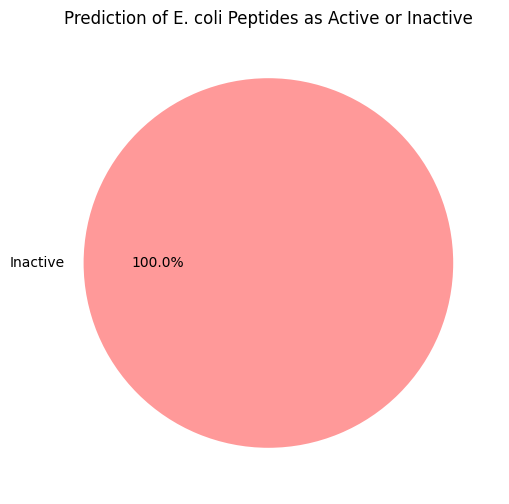

In [138]:
import matplotlib.pyplot as plt

# Display features and data count
print(f"Features used in the model: {expected_features}")
print(f"Number of data points in E. coli dataset: {len(ecoli_data)}")

# Determine Active and Inactive based on Average_Prob
threshold = 0.5
results['Prediction'] = np.where(results['Average_Prob'] >= threshold, 'Active', 'Inactive')

# Count Active and Inactive predictions
prediction_counts = results['Prediction'].value_counts()

# Plot Pie Chart
plt.figure(figsize=(8, 6))
plt.pie(prediction_counts, labels=prediction_counts.index, autopct='%1.1f%%', colors=['#ff9999', '#66b3ff'])
plt.title("Prediction of E. coli Peptides as Active or Inactive")
plt.show()


In [144]:
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import StandardScaler

# -----------------------------
# Load Models
# -----------------------------
rf_model = joblib.load('/content/drive/MyDrive/KP Model/Random Forest.pkl')
xgb_model = joblib.load('/content/drive/MyDrive/KP Model/XGBoost.pkl')
svm_model = joblib.load('/content/drive/MyDrive/KP Model/svm_model.pkl')

# -----------------------------
# Load Data
# -----------------------------
ps_data = pd.read_csv('/content/drive/MyDrive/PS/PS_Active_Feature_v1 no mic.csv')

# Standardize column names (remove leading/trailing spaces)
ps_data.columns = ps_data.columns.str.strip()

# -----------------------------
# Load Scaler and Verify Features
# -----------------------------
scaler = joblib.load('/content/drive/MyDrive/KPmodel/scaler.pkl')

# Check if the scaler has feature names
if hasattr(scaler, 'feature_names_in_'):
    expected_features = scaler.feature_names_in_
else:
    raise ValueError("Scaler does not have 'feature_names_in_' attribute. Verify scaler training.")

# Verify and reorder columns to match the training order
missing_features = [feat for feat in expected_features if feat not in ps_data.columns]

if missing_features:
    raise ValueError(f"Missing columns in PS data: {missing_features}")

# Reorder the columns to match the scaler's training order
ps_data = ps_data[expected_features]

# -----------------------------
# Apply Scaling
# -----------------------------
ps_scaled = scaler.transform(ps_data)

# -----------------------------
# Predict Using Each Model
# -----------------------------
rf_probs = rf_model.predict_proba(ps_scaled)[:, 1]
xgb_probs = xgb_model.predict_proba(ps_scaled)[:, 1]
svm_probs = svm_model.predict_proba(ps_scaled)[:, 1]

# -----------------------------
# Collect Predictions
# -----------------------------
results = pd.DataFrame({
    'Sequence': ps_data.index,  # Use index if 'Sequence' column is not available
    'RandomForest_Prob': rf_probs,
    'XGBoost_Prob': xgb_probs,
    'SVM_Prob': svm_probs
})

# Calculate Average Probability
results['Average_Prob'] = results[['RandomForest_Prob', 'XGBoost_Prob', 'SVM_Prob']].mean(axis=1)

# -----------------------------
# Save Results to CSV
# -----------------------------
output_path = '/content/drive/MyDrive/KP_Model_ps_predictions.csv'
results.to_csv(output_path, index=False)

# Display Top 5 Results
print(results.head())


   Sequence  RandomForest_Prob  XGBoost_Prob  SVM_Prob  Average_Prob
0         0               0.90      0.988020   0.24988      0.712633
1         1               0.82      0.984149   0.24988      0.684676
2         2               0.90      0.988020   0.24988      0.712633
3         3               0.90      0.988020   0.24988      0.712633
4         4               0.85      0.988020   0.24988      0.695967


In [146]:
print(f"Number of data points in ps dataset: {len(ps_data)}")

Number of data points in ps dataset: 102


Features used in the model: ['Length' 'Charge' 'Hydrophobicity' 'Molecular_Weight' 'Isoelectric_Point'
 'Number_of_Cysteines' 'Number_of_Disulfide_Bridges' 'Flexibility' 'Helix'
 'Turn' 'Sheet' 'A' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'K' 'L' 'M' 'N' 'P' 'Q'
 'R' 'S' 'T' 'V' 'W' 'Y']
Number of data points in E. coli dataset: 102


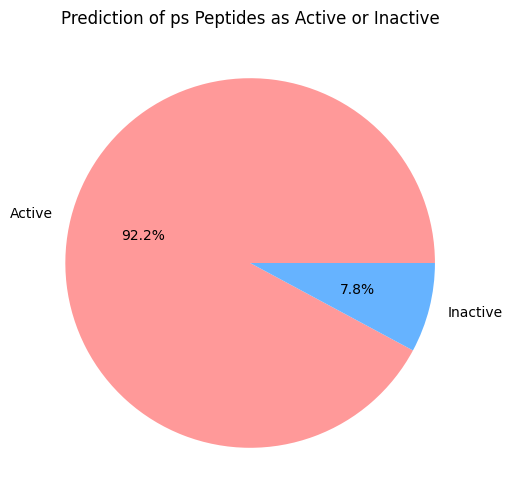

In [148]:
import matplotlib.pyplot as plt

# Display features and data count
print(f"Features used in the model: {expected_features}")
print(f"Number of data points in E. coli dataset: {len(ps_data)}")

# Determine Active and Inactive based on Average_Prob
threshold = 0.5
results['Prediction'] = np.where(results['Average_Prob'] >= threshold, 'Active', 'Inactive')

# Count Active and Inactive predictions
prediction_counts = results['Prediction'].value_counts()

# Plot Pie Chart
plt.figure(figsize=(8, 6))
plt.pie(prediction_counts, labels=prediction_counts.index, autopct='%1.1f%%', colors=['#ff9999', '#66b3ff'])
plt.title("Prediction of ps Peptides as Active or Inactive")
plt.show()